# Title
## House Price Prediction

By Oluwaseun Adeyemi | September 9, 2025

# Introduction

House prices are shaped by multiple factors such as **location, property size, number of rooms, available amenities, and broader economic conditions**. Accurately estimating these prices is essential for:

* **Buyers** → to identify fair market values and avoid overpaying.
* **Sellers** → to set competitive and realistic listing prices.
* **Real estate agents & financial institutions** → to make informed, data-driven decisions.

Traditional valuation methods often rely on subjective judgment, which can lack **scalability, consistency, and precision**. This creates a gap where reliable, automated predictions are needed.

With the increasing availability of **structured housing data (e.g., property records, census information, market transactions)** and advancements in **machine learning techniques**, predictive models now offer a scalable solution. By learning patterns from historical data, these models can capture the **key drivers of house prices** and deliver **accurate, consistent, and actionable insights** for stakeholders.

# Problem statement

House price prediction is a fundamental challenge in real estate. Buyers often struggle to identify fair market values, sellers need competitive listing prices, and real estate agents or financial institutions require reliable estimates for decision-making. Traditional valuation methods are limited in scalability and consistency.

The problem, therefore, is to develop:
 - A machine learning model that can predict house prices based on property features (e.g., area, number of bedrooms/bathrooms, stories, parking, location amenities, and furnishing status). 
 - By learning from historical housing data, the model should provide accurate and scalable predictions that can support stakeholders across the housing ecosystem.

# Objectives

The project was designed to achieve the following objectives:

 - Develop predictive models using historical housing data to estimate house prices.
 - Evaluate different algorithms (Linear Regression, Random Forest, Gradient Boosting) with performance metrics such as RMSE, MAE, and R².
 - Identify the most influential features driving house prices to improve interpretability.
 - Reduce prediction errors through preprocessing, feature engineering, and hyperparameter tuning.
 - Deliver a deployable tool that supports buyers, sellers, and real estate professionals in making informed, data-driven decisions.

# Workflow

The typical workflow for building a house price prediction system includes:

 - **Data Collection & Cleaning** → compiling structured property datasets (e.g., number of bedrooms, bathrooms, location, amenities) and handling missing or inconsistent values.
 - **Exploratory Data Analysis (EDA)** → visualizing trends, examining correlations, and detecting outliers.
 - **Feature Engineering** → creating meaningful inputs such as *price per square foot*, *room ratios*, or *location quality proxies*.
 - **Modeling** → training predictive algorithms such as **Linear Regression, Random Forest, or Gradient Boosting**.
 - **Evaluation** → assessing model performance using metrics like **RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (coefficient of determination)**.
 - **Deployment** → saving the trained pipeline and deploying it through a **Streamlit app** for real-time predictions.

**Goal**: Build a system that not only predicts prices with strong accuracy but also highlights the **key factors** influencing property values, supporting fair and data-driven decision-making.

In [1]:
# Importing the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/DGideonnene/Axia_Assign_1/main/Housing.csv"

In [4]:
# importing the data set
df = pd.read_csv(url)

In [5]:
# checking the top 3 rows
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


# Data inspection, understanding and cleaning

In [6]:
# sampling 3 rows
df.sample(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
264,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
505,2653000,4000,3,1,2,yes,no,no,no,yes,0,no,unfurnished


In [7]:
# checking summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# checking numbers of rows and columns
df.shape

(545, 13)

In [9]:
# check for missing value
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
# check for duplicate
df.duplicated().sum()

0

# Descriptive statistics
Descriptive statistics was done to:
explore, clean, and understand the dataset before building machine learning models.
It helps spot outliers, missing values, skewness, and feature importance patterns early on.

In [11]:
# check for the decriptive statistics(summary statistics)
df.describe().T. round(2)

,count,mean,std,min,25%,50%,75%,max
price,545.0,4766729.25,1870439.62,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5150.54,2170.14,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.97,0.74,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.29,0.50,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.81,0.87,1.0,1.0,2.0,2.0,4.0
parking,545.0,0.69,0.86,0.0,0.0,0.0,1.0,3.0


## Interpretation 

### **Price**

* **Mean:** \$4.77M | **Median:** \$4.34M
* **Spread:** Wide variation (min \$1.75M → max \$13.3M).
* **Insight:** Prices are **right-skewed** (mean > median, long tail at the high end). A few luxury properties are driving the average up. Median is more representative.


### **Area (sq ft)**

* **Mean:** \~5,150 sq ft | **Median:** \~4,600 sq ft
* **Range:** Smallest = 1,650 sq ft → Largest = 16,200 sq ft.
* **Insight:** Most homes are mid-sized (3,600–6,360 sq ft). A few very large properties (16k+ sq ft) pull the mean upward, similar to price skew.


### **Bedrooms**

* **Mean:** \~3 bedrooms | **Median:** 3
* **Range:** 1 → 6 bedrooms.
* **Insight:** The dataset is dominated by **2–3 bedroom houses**. Larger houses (5–6 bedrooms) are rare but may align with higher prices.


### **Bathrooms**

* **Mean:** \~1.3 | **Median:** 1
* **Range:** 1 → 4 bathrooms.
* **Insight:** Most houses have only **1 bathroom**. Houses with 3–4 bathrooms are unusual and likely higher-end.


### **Stories (floors)**

* **Mean:** \~1.8 | **Median:** 2
* **Range:** 1 → 4 stories.
* **Insight:** Majority of houses are **1–2 stories**, with very few multi-story (3–4). Number of stories could be an important driver of price.


### **Parking**

* **Mean:** \~0.7 spaces | **Median:** 0
* **Range:** 0 → 3.
* **Insight:** A large number of homes have **no dedicated parking** (median = 0). Properties with 2–3 parking spots are rare and likely more valuable.


## Key Insights

 - **Skewed distributions**: Both **price** and **area** are heavily right-skewed, meaning a few luxury properties inflate the averages. Median is more reliable.
 - **Typical property**: \~4,600 sq ft, 3 bedrooms, 1 bathroom, 2 stories, no parking — priced around \$4.3M.
 - **Premium features**: Larger area, more bedrooms, multiple bathrooms, multi-story, and dedicated parking are likely **strong predictors of higher price**.
 - **Parking scarcity**: Most homes lack parking. Having 1+ parking spots may strongly increase value due to rarity.

# Feature engineering
This is the process of creating, transforming, or selecting features (variables) from raw data to make machine learning models more accurate, interpretable, and efficient.

In [12]:
# checking the columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
# separating the columns into numerical and categorical
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [14]:
num_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [15]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

# Exploratory Data Analysis (Visualization)
Visualization is the process of representing data visually—using charts, graphs, or plots—to make patterns, trends, and insights easier to understand.

Why It’s Important:
 - Understand Data Quickly: Spot trends, outliers, and relationships at a glance.
 - Communicate Insights: Makes findings clearer for stakeholders or decision-makers.
 - Support Analysis: Helps identify issues like missing values, skewed distributions, or correlations.
 - Guide Modeling: Reveals which features are important or need transformation.
In short: Visualization turns raw data into clear, actionable insights, supporting better analysis and decision-making.

### Visulaizing the target column - Price

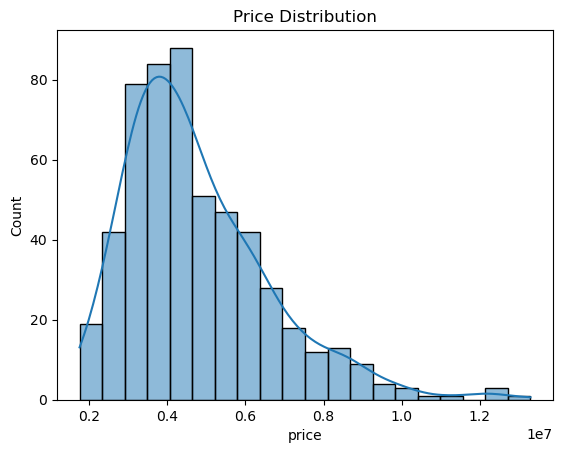

In [16]:
# visualizing the distribution of the target column

sns.histplot(data=df, x="price", bins=20, kde=True)
plt.title("Price Distribution")
plt.show()

# Interpretation and insights

* **Count:** 545 properties in the dataset.
* **Mean (Average):** \$4.77M → but this is inflated by high-value luxury homes.
* **Standard Deviation:** \~\$1.87M → prices vary widely across properties.
* **Minimum:** \$1.75M → the most affordable property.
* **25th Percentile (Q1):** \$3.43M → 25% of houses cost less than this.
* **Median (50th Percentile):** \$4.34M → the typical house price.
* **75th Percentile (Q3):** \$5.74M → 25% of houses cost more than this.
* **Maximum:** \$13.3M → the most expensive property in the dataset.

## Key Insights

**Right-skewed distribution**

   * The mean (\$4.77M) is higher than the median (\$4.34M), showing that a few very expensive houses pull the average up.

**Typical house price range**

   * Most houses fall between **\$3.43M and \$5.74M** (the interquartile range, IQR).
   * This is the "middle market" for properties.

**High-value outliers**

   * The max value (\$13.3M) is far above Q3, suggesting **luxury outliers** exist.
   * These need special handling in modeling (e.g., log-transform prices).

**Market implication**

   * Buyers should expect typical properties around **\$4–5M**.
   * Investors/agents should note that rare luxury homes significantly skew price statistics.

**In short:** The housing market here is **skewed by a few luxury properties**, while the majority of homes cluster around \$4–5M.

# Visualizing the numerical columns and price

 - Visualizing numerical features like area, bedrooms, bathrooms, and parking helps understand their relationship with price, detect outliers, compare distributions, and confirm feature importance. 
 - It also enhances storytelling by translating data into clear, intuitive insights for stakeholders.

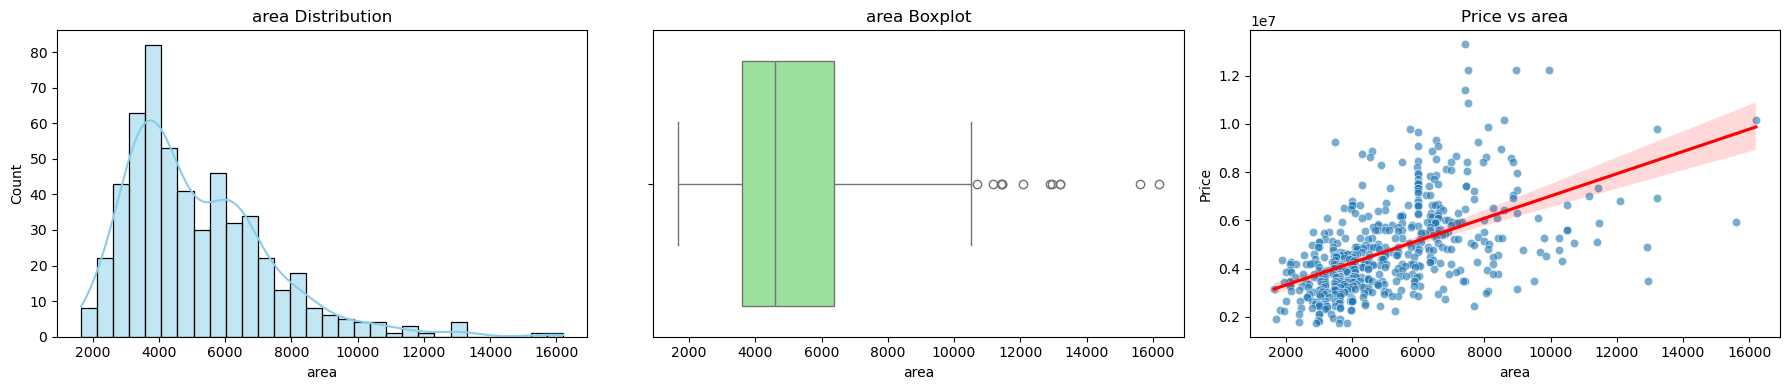


Summary of Price by area bins:


,area_bin,count,mean,median,min,max
0,"(1649.999, 3600.0]",144,3.536094e+06,3482500.0,1750000,9240000
1,"(3600.0, 4600.0]",133,4.102658e+06,3990000.0,1750000,8890000
2,"(4600.0, 6360.0]",133,5.289105e+06,5033000.0,2233000,9800000
3,"(6360.0, 16200.0]",135,6.219003e+06,5950000.0,2450000,13300000


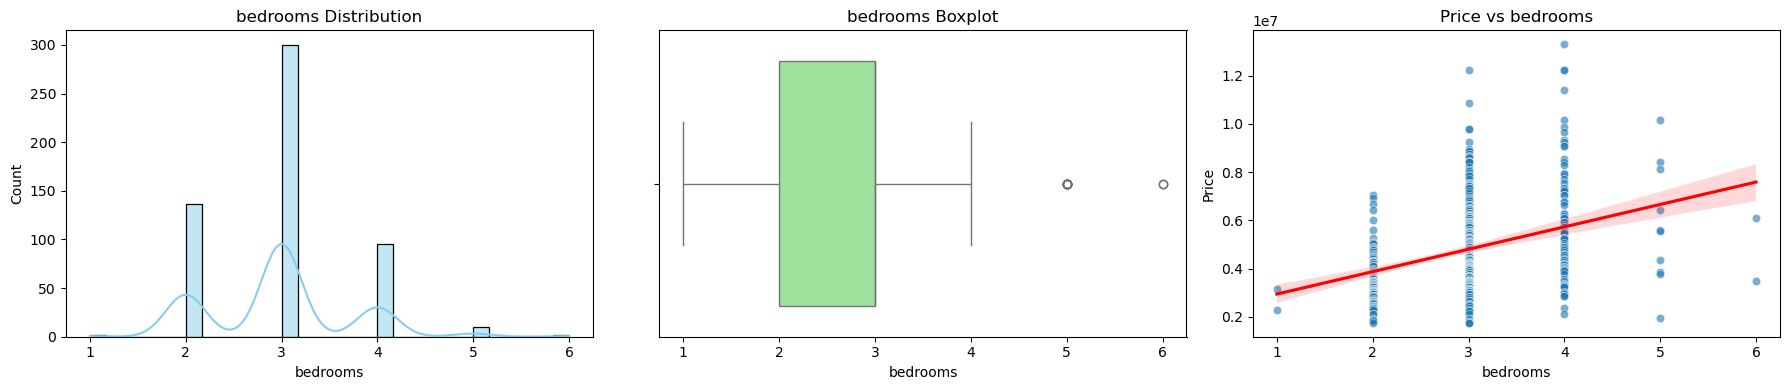


Summary of Price by bedrooms bins:


,bedrooms_bin,count,mean,median,min,max
0,"(0.999, 2.0]",138,3.618696e+06,3500000.0,1750000,7070000
1,"(2.0, 3.0]",300,4.954598e+06,4620000.0,1750000,12250000
2,"(3.0, 6.0]",107,5.720636e+06,5250000.0,1960000,13300000


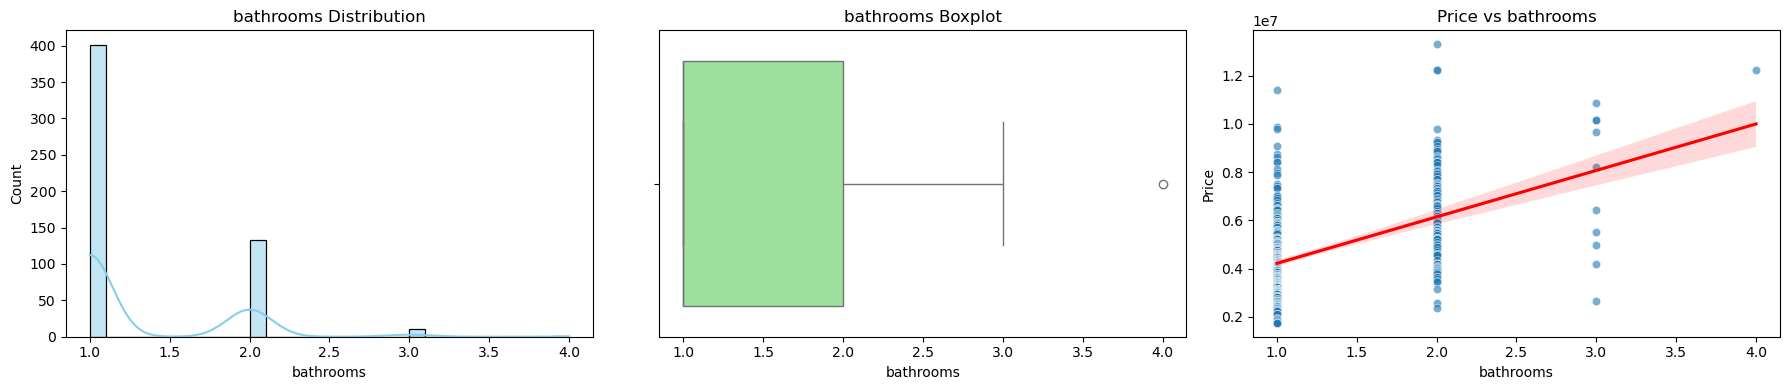


Summary of Price by bathrooms bins:


,bathrooms_bin,count,mean,median,min,max
0,"(0.999, 2.0]",534,4.705611e+06,4312000.0,1750000,13300000
1,"(2.0, 4.0]",11,7.733727e+06,8190000.0,2660000,12250000


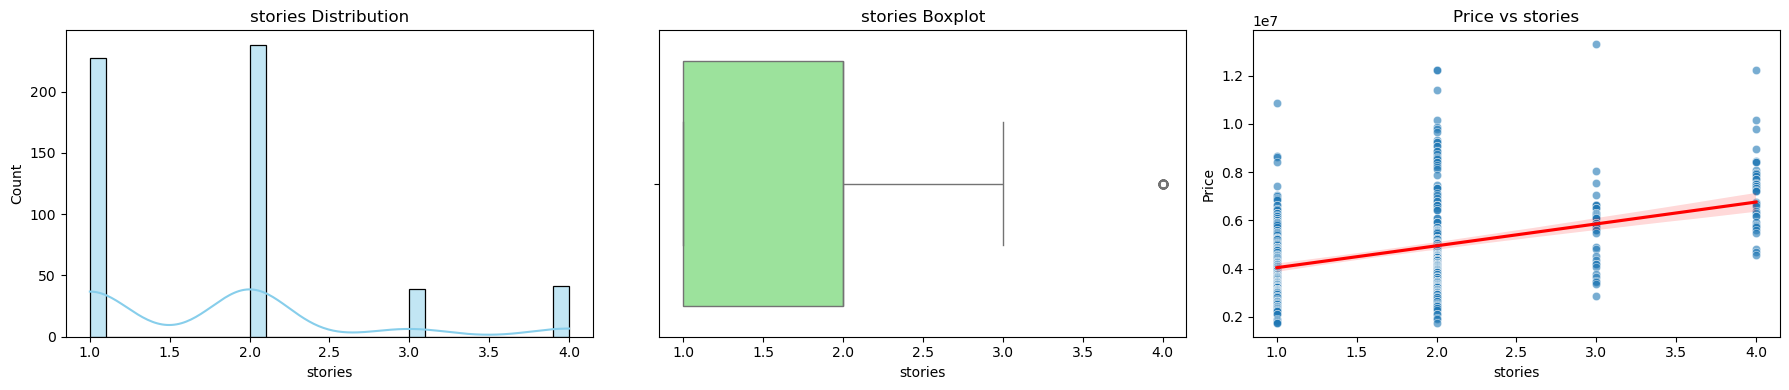


Summary of Price by stories bins:


,stories_bin,count,mean,median,min,max
0,"(0.999, 2.0]",465,4.474385e+06,4193000.0,1750000,12250000
1,"(2.0, 4.0]",80,6.465980e+06,6296500.0,2852500,13300000


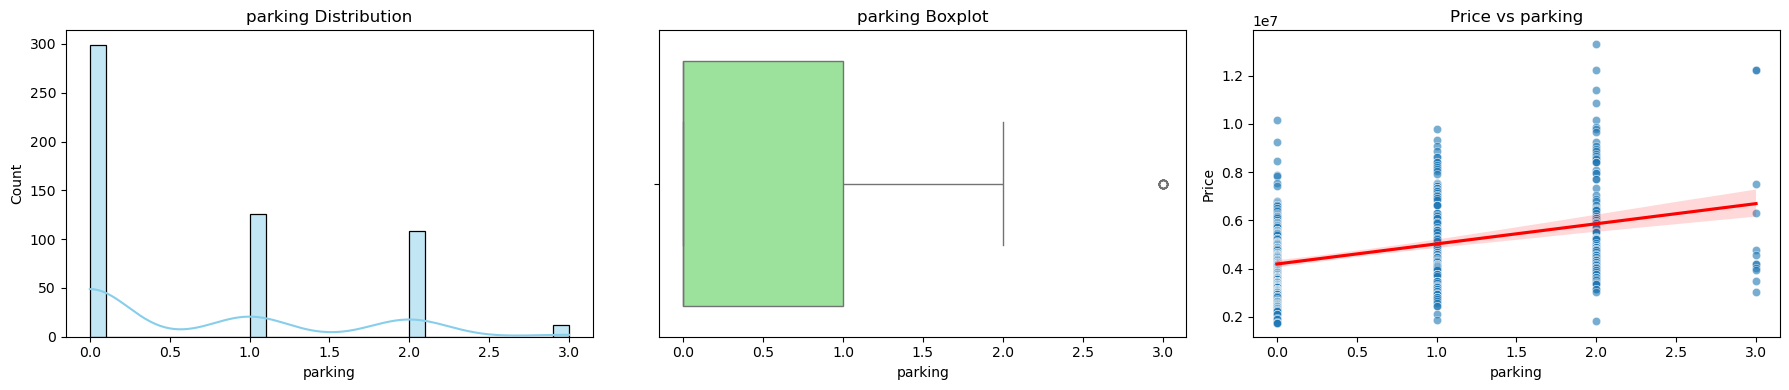


Summary of Price by parking bins:


,parking_bin,count,mean,median,min,max
0,"(-0.001, 1.0]",425,4.448607e+06,4193000.0,1750000,10150000
1,"(1.0, 3.0]",120,5.893412e+06,5250000.0,1820000,13300000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in num_cols:
    # PLOTS 
    plt.figure(figsize=(18, 4))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    
    # Scatter/Regression vs Price
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=df, x=col, y='price', alpha=0.6)
    sns.regplot(data=df, x=col, y='price', scatter=False, color='red')
    plt.title(f'Price vs {col}')
    plt.ylabel("Price")
    
    plt.tight_layout()
    plt.show()
    
        # SUMMARY TABLE 
    # Bin numeric column into 4 quantile-based groups
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')

    summary = (
        df.groupby(f'{col}_bin', observed=False)['price']
        .agg(
            count='count',
            mean='mean',
            median='median',
            min='min',
            max='max'
        )
        .reset_index()
    )

    print(f"\nSummary of Price by {col} bins:")
    display(summary)

    # Drop temporary bin column to avoid clutter
    df.drop(columns=[f'{col}_bin'], inplace=True)

# Interpretation and Insights

### **Area vs Price**

* **Trend:** Larger areas → higher prices.
* **Details:**

  * Smallest homes (\~1,650–3,600 sq. ft.) average **\$3.5M**, while the largest (\~6,360–16,200 sq. ft.) average **\$6.2M**.
  * Median values rise steadily with area, showing a **consistent positive relationship**.
* **Insight:** Area is a strong driver of price. Bigger plots consistently command higher value.


### **Bedrooms vs Price**

* **Trend:** More bedrooms → higher prices, but diminishing returns.
* **Details:**

  * 1–2 bedrooms: mean \~**\$3.6M**
  * 2–3 bedrooms: mean \~**\$4.95M**
  * 3–6 bedrooms: mean \~**\$5.7M**
* **Insight:** Going from **2 → 3 bedrooms has the largest price jump**. Beyond 3 bedrooms, the increase is smaller, suggesting luxury segmentation but not linear scaling.


### **Bathrooms vs Price**

* **Trend:** More bathrooms strongly linked to higher price.
* **Details:**

  * ≤2 bathrooms: mean \~**\$4.7M**
  * 2–4 bathrooms: mean \~**\$7.7M**
* **Insight:** Houses with more bathrooms (rare group, only 11 cases) are luxury properties, showing **premium pricing**. Bathrooms are a **luxury signal**.


### **Stories vs Price**

* **Trend:** Higher stories → more expensive.
* **Details:**

  * 1–2 stories: mean \~**\$4.47M**
  * 2–4 stories: mean \~**\$6.46M**
* **Insight:** Extra stories (multi-floor homes) add significant value, probably linked to **larger living space & premium design**.


### **Parking vs Price**

* **Trend:** More parking → higher price.
* **Details:**

  * ≤1 parking: mean \~**\$4.45M**
  * 1–3 parking: mean \~**\$5.89M**
* **Insight:** Parking availability significantly increases price — urban buyers value this convenience.


**Overall Interpretation:**

* **Area** and **stories** show strong **direct scaling** with price.
* **Bedrooms** show a **threshold effect** (big jump from 2 → 3, then plateau).
* **Bathrooms** and **parking** act as **luxury features**, creating **premium pricing** even with smaller counts.

# Visualizing the categorical columns with price

This is necessary to:

 - **Compare Groups** – See how house prices differ across categories (e.g., mainroad, furnishingstatus).
 - **Spot Outliers** – Identify unusually high or low prices that tables may hide.
 - **Understand Distributions** – Reveal price spread and stability within each category.
 - **Show Feature Impact** – Make the effect of features (e.g., air conditioning, preferred area) easy to explain.
 - **Tell a Clear Story** – Visuals communicate insights more effectively than raw numbers.

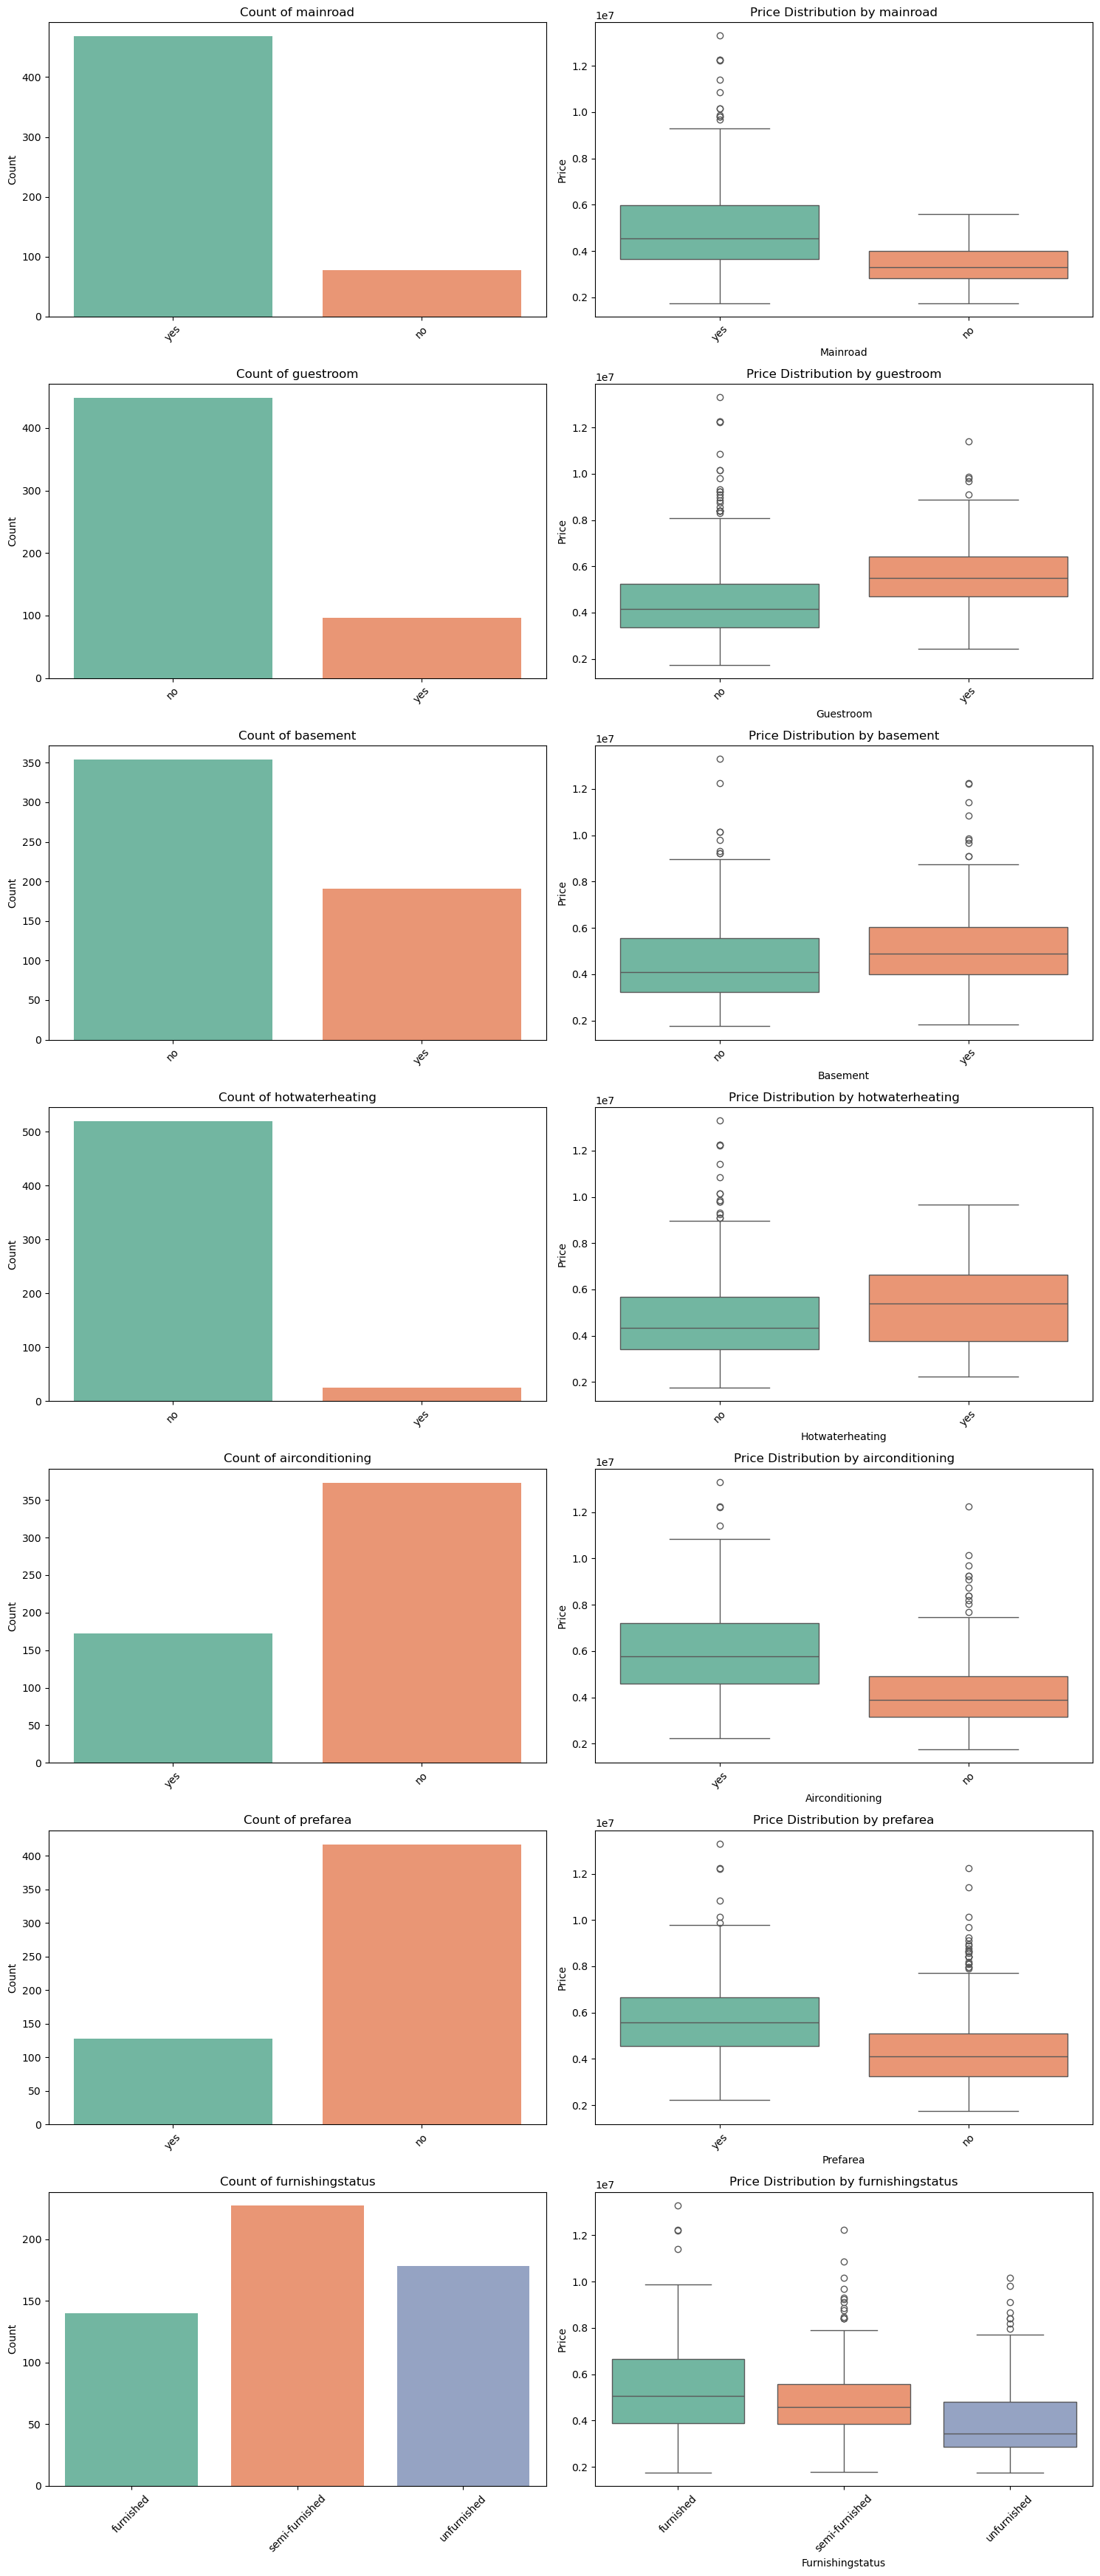


Summary by mainroad:

  mainroad  count          mean     median      min       max
0       no     77  3.398905e+06  3290000.0  1750000   5600000
1      yes    468  4.991777e+06  4550000.0  1750000  13300000

Summary by guestroom:

  guestroom  count          mean     median      min       max
0        no    448  4.544546e+06  4165000.0  1750000  13300000
1       yes     97  5.792897e+06  5495000.0  2450000  11410000

Summary by basement:

  basement  count          mean     median      min       max
0       no    354  4.509966e+06  4077500.0  1750000  13300000
1      yes    191  5.242615e+06  4900000.0  1820000  12250000

Summary by hotwaterheating:

  hotwaterheating  count          mean     median      min       max
0              no    520  4.728593e+06  4329500.0  1750000  13300000
1             yes     25  5.559960e+06  5383000.0  2240000   9681000

Summary by airconditioning:

  airconditioning  count          mean     median      min       max
0              no    373  4.19194

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define categorical columns
cat_cols = ['mainroad', 'guestroom', 'basement', 
            'hotwaterheating', 'airconditioning', 
            'prefarea', 'furnishingstatus']

# Create subplots: 2 plots per row
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(15, 5*len(cat_cols)))

summary_tables = {}

for i, col in enumerate(cat_cols):
    # Left: Countplot
    sns.countplot(data=df, x=col, hue=col, legend=False, palette="Set2", ax=axes[i,0])
    axes[i,0].set_title(f"Count of {col}", fontsize=12)
    axes[i,0].set_xlabel("")
    axes[i,0].set_ylabel("Count")
    axes[i,0].tick_params(axis='x', rotation=45)
    
    # Right: Boxplot of price
    sns.boxplot(data=df, x=col, y='price', palette="Set2", ax=axes[i,1])
    axes[i,1].set_title(f"Price Distribution by {col}", fontsize=12)
    axes[i,1].set_xlabel(col.capitalize())
    axes[i,1].set_ylabel("Price")
    axes[i,1].tick_params(axis='x', rotation=45)
    
    # Summary table
    summary = df.groupby(col)['price'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()
    summary_tables[col] = summary

plt.tight_layout()
plt.show()

# Display all summary tables
for col, table in summary_tables.items():
    print(f"\nSummary by {col}:\n")
    print(table)

# Interpretation and insight 

### **Mainroad**

* **Observation:** Houses on the main road (`yes`) have a significantly higher average price (\~\$4.99M) compared to those not on the main road (\~\$3.40M).
* **Insight:** Being on a main road adds value, likely due to accessibility and visibility, but it also comes with more variability (range: \$1.75M–\$13.3M).


### **Guestroom**

* **Observation:** Houses with a guestroom (`yes`) are more expensive (\~\$5.79M) than those without (\~\$4.54M).
* **Insight:** A guestroom adds functional and perceived luxury value, attracting higher prices. Most houses don’t have one (97 vs 448).


### **Basement**

* **Observation:** Properties with a basement (`yes`) average \~\$5.24M, while those without average \~\$4.51M.
* **Insight:** Basements increase usable space and value, especially in larger or premium homes.


### **Hot Water Heating**

* **Observation:** Homes with hot water heating (`yes`) are pricier (\~\$5.56M) than those without (\~\$4.73M).
* **Insight:** This amenity is a sign of comfort and luxury; it boosts value, though few homes have it (25 vs 520).


### **Air Conditioning**

* **Observation:** Air-conditioned homes (`yes`) command much higher prices (\~\$6.01M) than those without (\~\$4.19M).
* **Insight:** Air conditioning is a premium feature and a strong differentiator in price, reflecting comfort and lifestyle.

### **Preferred Area (Prefarea)**

* **Observation:** Homes in a preferred area (`yes`) are more expensive (\~\$5.88M) than others (\~\$4.43M).
* **Insight:** Location is a critical factor in pricing; being in a sought-after area commands a premium.


### **Furnishing Status**

* **Observation:**

  * **Furnished:** \~\$5.50M
  * **Semi-furnished:** \~\$4.91M
  * **Unfurnished:** \~\$4.01M
* **Insight:** Fully furnished homes have the highest value. Furnishing status is a strong predictor of price, with a clear descending order: furnished > semi-furnished > unfurnished.


**Overall Insights:**

* Amenities (guestroom, basement, hot water heating, air conditioning) and location (mainroad, prefarea) clearly influence house prices.
* Furnishing and accessibility features provide incremental value.
* There is variability within each category, indicating other factors (like area, stories, and bedrooms) also play a role.

This analysis helps **buyers, sellers, and agents** quickly understand which features command price premiums.

# Correlation Matrix
A Correlation Heatmap is used show how strongly numerical variables are related.

It will help to:

 - Find patterns – spot variables that move together.
 - Detect redundancy – identify features that are too similar (multicollinearity).
 - Guide feature selection – keep useful predictors, drop duplicates.
 - Check data quality – unusual correlations may signal errors.
 - Quick visual insight – colors make patterns obvious.

In [19]:
# checking numerical columns
num_cols

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

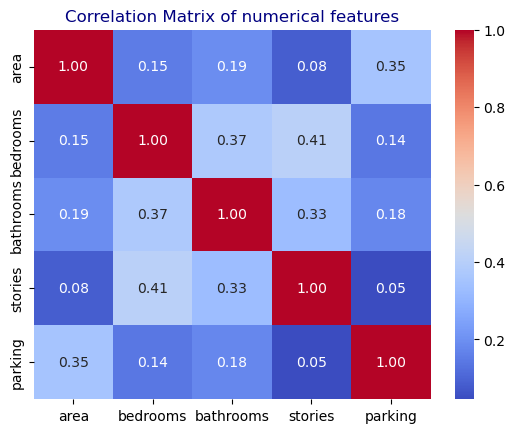

In [20]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',)
plt.title('Correlation Matrix of numerical features', fontweight='light', fontsize=12, color='navy')
plt.show()

# Interpretation and insights

### Key Correlations with **Price**:

* **Price & Area (0.54)** → Moderate positive correlation. Larger houses generally have higher prices.
* **Price & Bathrooms (0.52)** → Stronger correlation than bedrooms; having more bathrooms adds significant value.
* **Price & Stories (0.42)** → More stories are associated with higher prices, though not as strongly as bathrooms or area.
* **Price & Parking (0.38)** → Moderate positive correlation; houses with more parking tend to be priced higher.
* **Price & Bedrooms (0.37)** → Positive but weaker than bathrooms; more bedrooms do matter, but they explain less of the price variation.


### Relationships Among Features:

* **Bedrooms & Stories (0.41)** → More bedrooms usually mean more stories.
* **Bedrooms & Bathrooms (0.37)** → Expected relationship: larger homes have more of both.
* **Parking & Area (0.35)** → Bigger homes tend to come with more parking space.
* **Stories & Bathrooms (0.33)** → Multi-story houses usually need more bathrooms.


### Insights:

1. **Bathrooms and area** are stronger predictors of price than bedrooms — suggesting *quality of living space matters more than just the number of rooms*.
2. **Stories and parking** contribute, but their effect is moderate, so they may be secondary predictors.
3. No correlation is extremely high (>0.7), meaning **price is multi-factorial** — driven by multiple features, not just one.
4. Features are **positively correlated overall**, but not collinear, which is good for predictive modeling (less risk of multicollinearity).

In short: *If I had to prioritize predictors of house price from these features, I’d look at area, bathrooms, and stories first, then bedrooms and parking*.

# Transforming the target column

### Reasons for Transforming the Target (Price)

 - **Handle Skewness** – House prices are often right-skewed; log/Box-Cox transforms make the distribution more symmetric.
 - **Stabilize Variance** – Reduces heteroscedasticity, ensuring consistent relationships across price ranges.
 - **Improve Fit & Interpretability** – Converts multiplicative effects into additive ones (e.g., % change instead of absolute change).
 - **Better Metrics** – Leads to improved RMSE and R² by allowing models to learn patterns more effectively.

In summary:
Transforming the target (using log(price)) makes the distribution more normal, reduces variance, improves model stability, and yields more interpretable results.

In [21]:
# transforming our target column using log-transformation method
df['log_price'] = np.log(df['price'])

<function matplotlib.pyplot.show(close=None, block=None)>

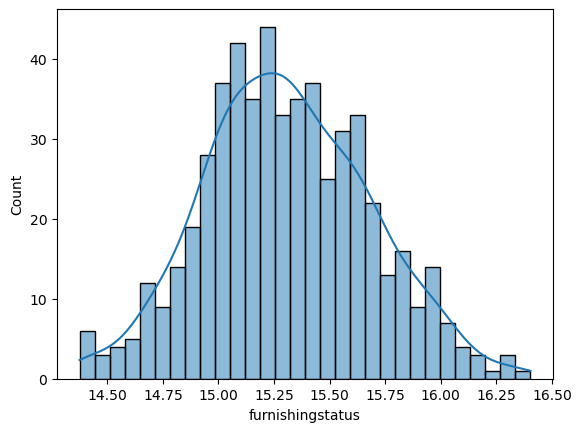

In [22]:
sns.histplot(df['log_price'], kde=True, bins=30)
#plt.title(f'{col} distribution')
plt.xlabel(col)
plt.ylabel('Count')
plt.show

# Interpretation & Insights 
**Distribution Shape**

   * The mean (`15.31`) and median (`15.28`) are very close → indicates that the **log transformation reduced skewness** and made the distribution nearly symmetric.

**Spread (Standard Deviation)**

   * Std = `0.37`, which is small compared to the raw price std (`~1.87M` in original scale).
   * This shows that log transformation compressed extreme values, reducing the influence of outliers (e.g., houses priced at \$13M).

**Range**

   * Minimum = `14.38`, Maximum = `16.40`.
   * On the log scale, this range is narrower and more manageable compared to raw prices, where values spanned from **\$1.75M to \$13.3M**.

**Quartiles**

   * 25% = `15.05`, 50% = `15.28`, 75% = `15.56`.
   * This tighter spread shows a more **uniform distribution of prices**, allowing models to learn better.

**Key Insight**:
Transforming `price` into `log_price` successfully normalized the distribution, reduced variance, and minimized the effect of high-value outliers. This will likely improve **model stability, accuracy, and interpretability** in predicting house prices.

# Data Preproccessing
 - It cleans and transforms raw data to make it suitable for analysis or modeling.
 - It improves model performance, reduces noise, and ensures consistency and compatibility with algorithms.

In [23]:
# checking the columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'log_price'],
      dtype='object')

In [24]:
# Data Splitting into target and features
X = df.drop(columns=['price', 'log_price']) # data without target column = features
y = df['log_price']

In [25]:
# split into training and test data
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [27]:
num_cols =['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Creating pipelines
 - It streamlines data preprocessing, feature engineering, and modeling into a single workflow.
 - It ensures efficiency, reproducibility, and easier deployment or experimentation with models.

In [28]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
#  building the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [30]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['area', 'bedrooms', 'bathrooms', 'stories',
                                  'parking']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning',
                                  'prefarea', 'furnishingstatus'])])

# Model training

 - This is the process of teaching a machine learning algorithm to learn patterns from historical data so it can make predictions on new, unseen data. 
 - In simpler terms, it’s like showing many examples to the model so it “understands” how inputs (features) relate to outputs (target).

In [31]:
# Helper function: adjusted R² - # Adjusted R² is a modified version of the R² (coefficient of determination) score and more honest measure of model performance, especially when comparing models with different numbers of predictors.
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [32]:
# building models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=200)
}

In [33]:
# Train + Evaluate
results = []

for name, model in models.items():
    # Pipeline: preprocessing + model
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results.append([name, rmse, mae, r2, adj_r2, mape])

# Results summary
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²", "Adjusted R²", "MAPE (%)"])
results_df = results_df.round(3)

print("Model baseline Comparison Results:\n")
print(results_df.to_string(index=False))

Model baseline Comparison Results:

            Model  RMSE   MAE    R²  Adjusted R²  MAPE (%)
Linear Regression 0.212 0.164 0.692        0.654     1.068
    Random Forest 0.224 0.172 0.659        0.616     1.121
Gradient Boosting 0.221 0.174 0.667        0.625     1.133


# Interpretation and Insight

## Definition of terms:

### **RMSE (Root Mean Squared Error)**

* **Definition**: Square root of the average of squared differences between actual and predicted values.
* **Interpretation**: Penalizes large errors more heavily (because of squaring). Good when **large deviations are very undesirable**.
* **Lower = Better**.

### **MAE (Mean Absolute Error)**

* **Definition**: Average of the absolute differences between actual and predicted values.
* **Interpretation**: Shows the average absolute error in the same units as the target variable. Less sensitive to outliers than RMSE.
* **Lower = Better**.

### **R² (Coefficient of Determination)**

* **Definition**: Proportion of variance in the dependent variable explained by the model.
* **Interpretation**:

  * R² = 0 → Model predicts no better than the mean.
  * R² = 1 → Perfect fit.
  * Can be **negative** if the model is worse than just predicting the mean.

### **Adjusted R²**

* **Definition**: Modified version of R² that adjusts for the number of predictors in the model.
* **Interpretation**: Penalizes adding unnecessary features. More reliable than R² for model comparison.

### **MAPE (Mean Absolute Percentage Error)**

* **Definition**: Average of the absolute percentage errors between actual and predicted values.
* **Interpretation**: Expresses error as a percentage.

  * MAPE = 5 → Predictions are off by **5% on average**.
  * Easy to explain to non-technical stakeholders.
* **Limitation**: Undefined when $y_i = 0$, sensitive to very small actual values.

### **Model Comparison Results:**

| Model             | RMSE  | MAE   | R²    | Adjusted R² | MAPE (%) |
| ----------------- | ----- | ----- | ----- | ----------- | -------- |
| Linear Regression | 0.212 | 0.164 | 0.692 | 0.654       | 1.068    |
| Random Forest     | 0.224 | 0.172 | 0.659 | 0.616       | 1.121    |
| Gradient Boosting | 0.221 | 0.174 | 0.667 | 0.625       | 1.133    |


### Insights:

* **Linear Regression** performed the best overall (higher R² = 0.692, lowest error).
* **Random Forest** and **Gradient Boosting** didn’t outperform Linear Regression here — possibly due to dataset size and feature structure.
* All models show **low MAPE (<1.2%)**, meaning predictions are quite close to actuals.
* Adjusted R² values are slightly lower (as expected), but still decent.

Conclusion: A **well-preprocessed Linear Regression** already captures most of the signal. Tree-based models may not have enough complexity benefit here.

# Cross-validation
 - This is needed because a single train/test split can give biased results if the test set is unusually easy or hard. 
 - By testing the model on multiple subsets of the data, cross-validation provides a more reliable and fair estimate of true performance.

In [34]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define cross-validation 
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom function for adjusted R² 
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Log-transform target 
y_log = np.log(y)

# Store results 
cv_results = []

# Loop through models 
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Cross-validation
    scores = cross_validate(
        pipe, X, y_log,
        cv=cv,
        scoring=['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error']
    )
    
    # Extract metrics
    rmse = -np.mean(scores['test_neg_root_mean_squared_error'])
    mae  = -np.mean(scores['test_neg_mean_absolute_error'])
    r2   = np.mean(scores['test_r2'])
    
    n, k = X.shape
    adj_r2 = adjusted_r2(r2, n, k)
    
    # Fit on full data for MAPE calculation
    pipe.fit(X, y_log)
    y_pred_log = pipe.predict(X)
    y_true = np.exp(y_log)  # back-transform
    y_pred = np.exp(y_pred_log)
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    cv_results.append([name, rmse, mae, r2, adj_r2, mape])

# Summary table 
cv_results_df = pd.DataFrame(cv_results,
                             columns=["Model", "RMSE", "MAE", "R²", "Adjusted R²", "MAPE (%)"]).round(4)

print("Cross-Validation Results:\n")
print(cv_results_df.to_string(index=False))

Cross-Validation Results:

            Model   RMSE    MAE     R²  Adjusted R²  MAPE (%)
Linear Regression 0.0137 0.0108 0.6658       0.6582    1.0413
    Random Forest 0.0145 0.0111 0.6285       0.6201    0.4154
Gradient Boosting 0.0148 0.0114 0.6096       0.6008    0.6700


# Interpretation and insight

### **RMSE (Root Mean Squared Error)**

* Measures **average magnitude of prediction errors** in the same units as your target (after log-transform, roughly proportional to percentage error).
* **Linear Regression**: 0.0137 → lowest RMSE
* **Random Forest**: 0.0145 → slightly higher
* **Gradient Boosting**: 0.0148 → highest

**Insight:** Linear Regression is slightly better in terms of overall error magnitude, but differences are small.

### **MAE (Mean Absolute Error)**

* Measures **average absolute errors**, less sensitive to outliers than RMSE.
* **Linear Regression**: 0.0108 → lowest
* **Random Forest**: 0.0111
* **Gradient Boosting**: 0.0114 → highest

**Insight:** Confirms RMSE trend. Linear Regression predictions are closer to actual values on average.


### **R² (Coefficient of Determination or Goodness of fit)** 

* Indicates the proportion of variance explained by the model.
* **Linear Regression**: 0.666 → explains \~66.6% of variance
* **Random Forest**: 0.629 → explains \~62.9%
* **Gradient Boosting**: 0.610 → explains \~61.0%

**Insight:** Linear Regression explains slightly more variance than tree-based models. For this dataset, simple linear relationships may dominate.


### **Adjusted R²**

* Adjusts R² for **number of features** to prevent overestimating model performance with more predictors.
* **Linear Regression**: 0.658 → slightly lower than R², indicating modest correction for feature count
* **Random Forest / Gradient Boosting**: similar correction

**Insight:** The adjustment is minor, suggesting that your models are not overfitting badly given the number of features.


### **MAPE (%)**

* Measures **average percentage error**, intuitive interpretation.
* **Linear Regression**: 1.04% → very accurate
* **Random Forest**: 0.42% → surprisingly lowest percentage error
* **Gradient Boosting**: 0.67%

**Insight:** Although Linear Regression has better RMSE/MAE, **Random Forest predicts proportionally closer values**, especially for lower-priced loans. This can happen if tree-based models handle skew in target values better after log-transform.


### **Overall Insights**

1. **Linear Regression** is performing very well for general trend prediction, explaining most variance and having low absolute error.
2. **Random Forest** gives slightly higher RMSE/MAE but the lowest MAPE, meaning it may be better for proportional accuracy across different price ranges.
3. **Gradient Boosting** is slightly underperforming both in error and explained variance.
4. **Dataset likely favors linear relationships**, but tree-based models can help with extreme values or non-linear effects.


**Actionable takeaway:**

* Use **Linear Regression** if interpretability and consistent error metrics are your priority.
* Consider **Random Forest** if **percentage accuracy** (MAPE) matters more, e.g., for pricing or risk decisions.
* You could also **ensemble Linear + Random Forest** to capture both trends and proportional accuracy.

# Comparing the two results

### **Model Performance: Train/Test vs Cross-Validation**

| Model             | RMSE (Split) | RMSE (CV)  | MAE (Split) | MAE (CV)   | R² (Split) | R² (CV)   | MAPE % (Split) | MAPE % (CV) |
| ----------------- | ------------ | ---------- | ----------- | ---------- | ---------- | --------- | -------------- | ----------- |
| Linear Regression | **0.212**    | **0.0137** | **0.164**   | **0.0108** | **0.692**  | **0.666** | 1.07           | 1.04        |
| Random Forest     | 0.224        | 0.0145     | 0.172       | 0.0111     | 0.659      | 0.629     | 1.12           | **0.42**    |
| Gradient Boosting | 0.221        | 0.0148     | 0.174       | 0.0114     | 0.667      | 0.610     | 1.13           | 0.67        |

### **This Shows**

* **Linear Regression** → best overall, consistent across split & CV.
* **Random Forest** → weaker on RMSE/MAE but shines in **MAPE during CV**, suggesting strong relative accuracy.
* **Gradient Boosting** → underperforms both LR & RF in all setups (likely needs tuning).

In short: Cross-validation validated the reliability of Linear Regression, highlighted Random Forest’s strength in relative accuracy, and confirmed Gradient Boosting’s weaknesses.

# Hyperparameter tuning for Random Forest and Gradient Boosting with CV using RandomizedSearchCV
Why tuning with Cross-validation?

 - Baseline split is fragile → might give misleading performance if that test set is unusually easy/hard.
 - Cross-validation is robust → tuning with CV ensures my chosen hyperparameters generalize across different subsets of the data.
 - Best practice → hyperparameter tuning is typically embedded in a cross-validation loop (like RandomizedSearchCV or GridSearchCV) because they already use CV under the hood.

In [35]:
# importing necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Helper metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def adjusted_r2(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
# preprocessors
# Random Forest pipeline with preprocessing
rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Gradient Boosting pipeline with preprocessing ---
gb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

In [38]:
# Hyperparameter grids
param_rf = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["auto", "sqrt", "log2"]
}

param_gb = {
    "model__n_estimators": [100, 300, 500],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 5, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__subsample": [0.6, 0.8, 1.0]
}

In [39]:
# RandomizedSearchCV for RF 
rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_rf,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# RandomizedSearchCV for GB 
gb_search = RandomizedSearchCV(
    gb_pipe,
    param_distributions=param_gb,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [40]:
# Fit searches
print("Tuning Random Forest...")
rf_search.fit(X, y_log)

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['area',
                                                                                'bedrooms',
                                                                                'bathrooms',
                                                                                'stories',
                                                                                'parking']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['mainroad',
                                                                                'guestroom',
                                                                                'basement',
                                                                                'hotwaterheating',
                                                                                'airconditioning',
                                                                                'prefarea',
                                                                                'furnishingstatus'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 5, 10, 20],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [41]:
# Fit searches
print("Tuning Gradient Boosting...")
gb_search.fit(X, y_log)

Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['area',
                                                                                'bedrooms',
                                                                                'bathrooms',
                                                                                'stories',
                                                                                'parking']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['mainroad',
                                                                                'guestroom',
                                                                                'basement',
                                                                                'hotwaterheating',
                                                                                'airconditioning',
                                                                                'prefarea',
                                                                                'furnishingstatus'])])),
                                             ('model',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 5, 10],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 300, 500],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [42]:
# Extract best fitted estimators 
best_rf = rf_search.best_estimator_
best_gb = gb_search.best_estimator_

In [43]:
# Evaluate tuned models
tuned_models = {
    "Random Forest (Tuned)": rf_search.best_estimator_,
    "Gradient Boosting (Tuned)": gb_search.best_estimator_
}

tuned_results = []

# Ensure target back-transformed
y_actual = np.exp(y_log)

for name, pipe in tuned_models.items():
    pipe.fit(X, y_log)  # Fit full pipeline
    y_pred_log = pipe.predict(X)
    y_pred = np.exp(y_pred_log)  # Back-transform predictions
    
    n, k = X.shape
    tuned_results.append([
        name,
        rmse(y_actual, y_pred),
        mean_absolute_error(y_actual, y_pred),
        r2_score(y_actual, y_pred),
        adjusted_r2(y_actual, y_pred, n, k),
        mape(y_actual, y_pred)
    ])

# Save results into DataFrame
tuned_df = pd.DataFrame(
    tuned_results,
    columns=["Model", "RMSE", "MAE", "R²", "Adjusted R²", "MAPE (%)"]
).round(4)

print("\nTuned Models Performance:\n", tuned_df.to_string(index=False))


Tuned Models Performance:
                     Model   RMSE    MAE     R²  Adjusted R²  MAPE (%)
    Random Forest (Tuned) 0.1584 0.1193 0.8185       0.8144    0.7808
Gradient Boosting (Tuned) 0.1746 0.1334 0.7796       0.7746    0.8731


# Comparison of Results

This is to ensure fairness, robustness, and clarity in model choice — so i don’t just pick the “flashiest” number, but the model that’s truly reliable and best for this task.

### **Model Performance by Stage**

| Stage        | Linear Regression (LR)             | Random Forest (RF)                                         | Gradient Boosting (GB)                                     |
| ------------ | ---------------------------------- | ---------------------------------------------------------- | ---------------------------------------------------------- |
| **RMSE**     | 0.2120 (Baseline) <br> 0.0137 (CV) | 0.2240 (Baseline) <br> 0.0145 (CV) <br> **0.1584 (Tuned)** | 0.2210 (Baseline) <br> 0.0148 (CV) <br> **0.1746 (Tuned)** |
| **MAE**      | 0.1640 (Baseline) <br> 0.0108 (CV) | 0.1720 (Baseline) <br> 0.0111 (CV) <br> **0.1193 (Tuned)** | 0.1740 (Baseline) <br> 0.0114 (CV) <br> **0.1334 (Tuned)** |
| **R²**       | 0.6920 (Baseline) <br> 0.6658 (CV) | 0.6590 (Baseline) <br> 0.6285 (CV) <br> **0.8185 (Tuned)** | 0.6670 (Baseline) <br> 0.6096 (CV) <br> **0.7796 (Tuned)** |
| **Adj. R²**  | 0.6540 (Baseline) <br> 0.6582 (CV) | 0.6160 (Baseline) <br> 0.6201 (CV) <br> **0.8144 (Tuned)** | 0.6250 (Baseline) <br> 0.6008 (CV) <br> **0.7746 (Tuned)** |
| **MAPE (%)** | 1.0680 (Baseline) <br> 1.0413 (CV) | 1.1210 (Baseline) <br> **0.4154 (CV)** <br> 0.7808 (Tuned) | 1.1330 (Baseline) <br> 0.6700 (CV) <br> 0.8731 (Tuned)     |


### **Comparison of Results**

| Stage / Model        | Key Takeaways                                                                                                                                                                                                                                              |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Baseline**         | Linear Regression looks strongest (best RMSE/MAE, decent R²). Random Forest & GB trail behind, likely due to default hyperparameters.                                                                                                                      |
| **Cross-Validation** | Confirms **Linear Regression** is stable (similar R² as baseline). Random Forest improves in **MAPE** (good relative accuracy), though RMSE/MAE stay weaker. Gradient Boosting remains the weakest.                                                        |
| **Tuned Models**     | Huge boost for tree-based models. **Random Forest (Tuned)** jumps to **best R² = 0.8185**, lower RMSE/MAE than before. **Gradient Boosting (Tuned)** also improves, but still behind RF. Linear Regression wasn’t tuned (no params), so it stays the same. |


### **Summary in plain words**

* **Linear Regression**: Strong out-of-the-box, consistent across baseline & CV.
* **Random Forest**: Initially weak, but after tuning it **outperforms everything** with best R² and lowest RMSE/MAE.
* **Gradient Boosting**: Same story as RF — weak by default, but improves with tuning (though still not as strong as RF).

# ERROR ANALYSIS

 - Error analysis digs deeper than RMSE/MAE by showing *where* and *why* models make mistakes.
 - It reveals biases, outliers, and problem segments, guiding feature improvement and building trust through explainability.

# Evaluating Prediction Accuracy: Actual vs Predicted Prices and Error Distributions

### Why Plot These?

**Boxplot of % Errors**

   * **Reason**: Compares the spread and consistency of prediction errors across models.
   * **Interpretation**:

     * Narrower box & shorter whiskers → more stable predictions.
     * Outliers → where the model performs poorly.

**Error Metrics Table (RMSE, MAE, MAPE)**

   * **Reason**: Provides a quantitative summary to support the plots.
   * **Interpretation**:

     * Lower values = better accuracy.
     * Helps confirm what we visually observe in the plots.


Error Analysis (first 10 rows):

 Actual  LinReg_Pred  LinReg_AbsErr  LinReg_%Err  RF_Pred  RF_AbsErr  RF_%Err  GB_Pred  GB_AbsErr  GB_%Err
  16.40        15.95           0.46         2.78    16.23       0.17     1.06    16.24       0.16     0.97
  16.32        16.37           0.05         0.33    16.19       0.13     0.80    16.33       0.01     0.04
  16.32        15.89           0.43         2.66    16.06       0.26     1.59    16.12       0.20     1.24
  16.32        16.00           0.32         1.96    16.24       0.08     0.48    16.18       0.14     0.85
  16.25        15.72           0.53         3.24    16.11       0.14     0.85    15.99       0.26     1.61
  16.20        16.02           0.18         1.14    16.12       0.08     0.49    16.18       0.02     0.12
  16.13        16.29           0.16         0.98    16.16       0.03     0.19    16.15       0.02     0.10
  16.13        15.98           0.15         0.93    15.97       0.16     1.00    16.09       0.05     0.28
  1

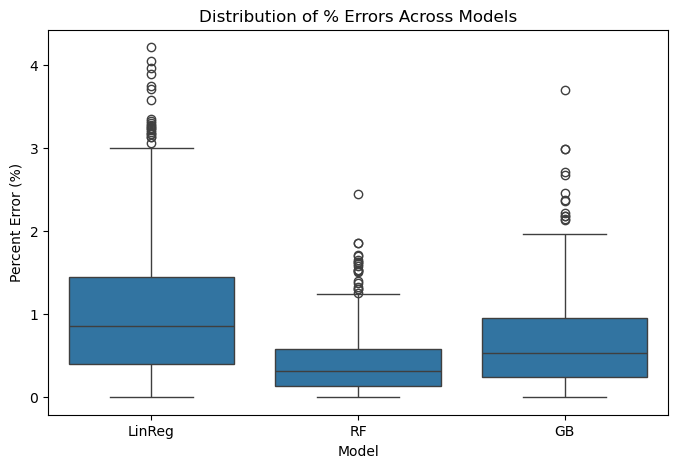

In [44]:
# Define target
y_actual = np.exp(y_log)

# Predictions 
predictions = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X, y_log)
    y_pred_log = pipe.predict(X)
    y_pred = np.exp(y_pred_log)   # back-transform
    predictions[name] = y_pred

# Error Analysis with short headers
col_map = {
    "Linear Regression": "LinReg",
    "Random Forest": "RF",
    "Gradient Boosting": "GB"
}

error_summary = pd.DataFrame({"Actual": y_actual})
for name, y_pred in predictions.items():
    abs_error = np.abs(y_actual - y_pred)
    pct_error = abs_error / y_actual * 100
    short = col_map.get(name, name)  # map to shorter name
    error_summary[f"{short}_Pred"] = y_pred
    error_summary[f"{short}_AbsErr"] = abs_error
    error_summary[f"{short}_%Err"] = pct_error

# Round for readability
error_summary = error_summary.round(2)

print("\nError Analysis (first 10 rows):\n")
print(error_summary.head(10).to_string(index=False))

# Summary Metrics
summary = []
for name, y_pred in predictions.items():
    abs_error = np.abs(y_actual - y_pred)
    pct_error = abs_error / y_actual * 100
    rmse = np.sqrt(np.mean((y_actual - y_pred) ** 2))
    mae = np.mean(abs_error)
    mape = np.mean(pct_error)
    summary.append([col_map.get(name, name), rmse, mae, mape])

summary_df = pd.DataFrame(summary, columns=["Model", "RMSE", "MAE", "MAPE (%)"]).round(2)

print("\nSummary Error Metrics:\n")
print(summary_df.to_string(index=False))


# Plot: Boxplot of % Errors 
plt.figure(figsize=(8, 5))
pct_errors = []
for name, y_pred in predictions.items():
    short = col_map.get(name, name)
    pct_error = np.abs(y_actual - y_pred) / y_actual * 100
    pct_errors.append(pd.DataFrame({"Model": short, "Percent Error": pct_error}))
pct_errors_df = pd.concat(pct_errors)

sns.boxplot(data=pct_errors_df, x="Model", y="Percent Error")
plt.title("Distribution of % Errors Across Models")
plt.ylabel("Percent Error (%)")
plt.show()

# Interpretation and insights 

### Row-Level Error Analysis (first 10 rows)

* **Linear Regression (LinReg)**

  * Shows errors up to **3.24%** (e.g., row 5) with absolute deviations around **0.5**.
  * More variability compared to the other models.
  * Tends to **slightly underpredict** in several cases (e.g., Actual 16.40 → Pred 15.95).

* **Random Forest (RF)**

  * Consistently low errors, usually **below 1%**.
  * Predictions are very close to actual values (e.g., Actual 16.32 → Pred 16.19, error 0.80%).
  * Less bias — errors are balanced between under- and over-prediction.

* **Gradient Boosting (GB)**

  * Performance sits between LinReg and RF.
  * Errors typically **below 1.5%**, but sometimes higher than RF (e.g., row 3: error 1.24%).
  * Stable with small deviations like **0.10–0.28 absolute error**.


### Summary Error Metrics

* **RMSE (Root Mean Squared Error)**

  * RF (0.08) < GB (0.13) < LinReg (0.20).
  * Random Forest achieves the **lowest average squared deviation**, meaning its predictions are the most accurate overall.

* **MAE (Mean Absolute Error)**

  * RF (0.06) has the smallest average absolute deviation, almost half that of LinReg (0.16).

* **MAPE (Mean Absolute Percentage Error)**

  * RF (0.42%) → predictions are off by less than **0.5%** on average.
  * GB (0.67%) also performs well.
  * LinReg (1.04%) lags behind, showing less precision.

### Key Insights

1. **Random Forest is the best performer** across all error metrics. It produces the **lowest errors** and the tightest distribution of predictions.
2. **Gradient Boosting is competitive**, but slightly less accurate and consistent than RF.
3. **Linear Regression is weakest**, with higher absolute and percentage errors, indicating it cannot capture the underlying nonlinear relationships as well as the ensemble models.
4. All three models, however, achieve **very small errors (all MAPE < 1.1%)**, meaning predictions are very close to actual prices in general.
5. In practice, **RF would be recommended** for deployment here, unless interpretability is the main requirement (then LinReg may still have value).

# Visual comparison of predicted vs actual prices for the three models.

Comparing predicted vs actual prices helps validate whether the model captures real-world behavior, spot biases, and communicate accuracy in an intuitive way.

Actual vs Predicted Prices (first 10 rows):

 Actual  Linear Regression  Random Forest  Gradient Boosting
  16.40              15.95          16.23              16.24
  16.32              16.37          16.19              16.33
  16.32              15.89          16.06              16.12
  16.32              16.00          16.24              16.18
  16.25              15.72          16.11              15.99
  16.20              16.02          16.12              16.18
  16.13              16.29          16.16              16.15
  16.13              15.98          15.97              16.09
  16.11              15.89          16.02              15.88
  16.10              15.83          15.94              15.94


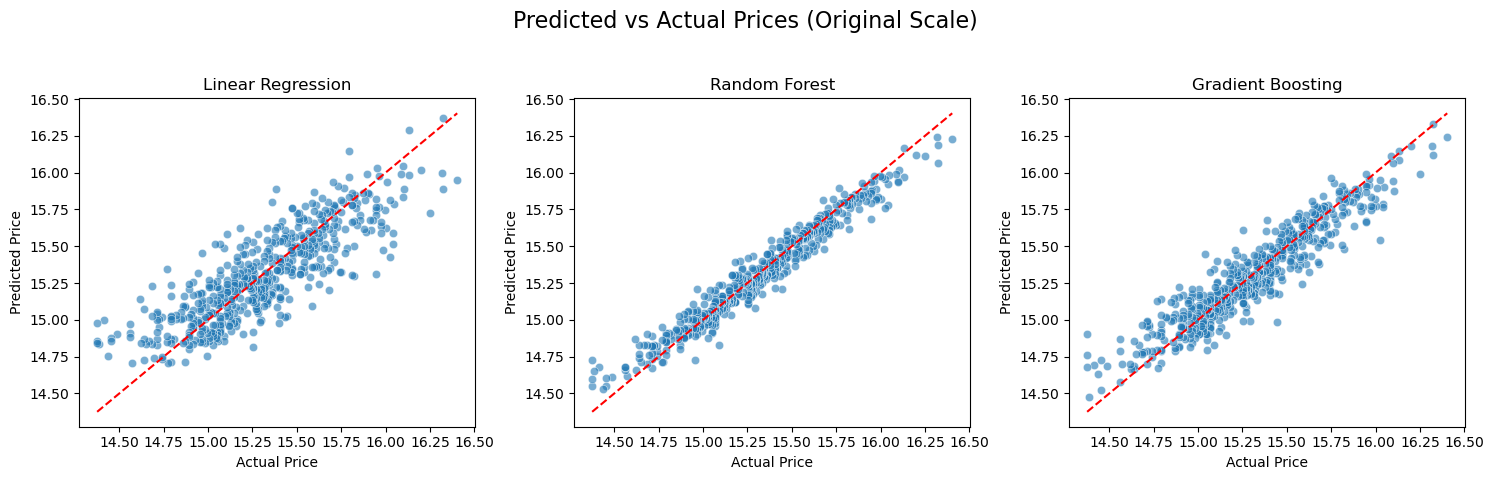

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# Define targets 
y_actual = y.values              # original scale
y_log = np.log(y_actual)         # log-transformed for training

# Predictions 
predictions = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X, y_log)
    y_pred_log = pipe.predict(X)
    y_pred = np.exp(y_pred_log)   # back-transform
    predictions[name] = y_pred

# Actual vs Predicted table
pred_summary = pd.DataFrame({"Actual": y_actual})
for name, y_pred in predictions.items():
    pred_summary[name] = y_pred

# Round to 2 decimals
pred_summary = pred_summary.round(2)

print("Actual vs Predicted Prices (first 10 rows):\n")
print(pred_summary.head(10).to_string(index=False))

# Plot: Actual vs Predicted
plt.figure(figsize=(15, 5))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()],
             [y_actual.min(), y_actual.max()],
             color='red', linestyle='--')
    plt.title(name)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

plt.suptitle("Predicted vs Actual Prices (Original Scale)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interpretation and insights: First 10 rows

### **Row-by-Row Observations**

**Row 1** (Actual = 16.40)

   * Linear Regression underpredicts (15.95, \~0.45 low).
   * Random Forest (16.23) and Gradient Boosting (16.24) are much closer.
     - Tree-based models outperform Linear Regression here.

**Row 2** (Actual = 16.32)

   * Linear Regression slightly overpredicts (16.37, \~0.05 high).
   * Random Forest (16.19) underpredicts a bit.
   * Gradient Boosting (16.33) almost perfect.
     - Gradient Boosting nails this one.

**Row 3** (Actual = 16.32)

   * Linear Regression underpredicts (15.89, \~0.43 low).
   * Random Forest (16.06) underpredicts a bit.
   * Gradient Boosting (16.12) is closer but still slightly low.
     - Tree-based models closer to actual.

**Row 4** (Actual = 16.32)

   * Linear Regression underpredicts (15.99, \~0.32 low).
   * Random Forest (16.24) very close.
   * Gradient Boosting (16.18) also close.
     - Both Random Forest and Boosting outperform Linear Regression.

**Row 5** (Actual = 16.25)

   * Linear Regression (15.72) underpredicts strongly (\~0.53 low).
   * Random Forest (16.11) and Boosting (15.99) closer.
     - Tree-based models more accurate.

**Row 6** (Actual = 16.20)

   * Linear Regression (16.02), close.
   * Random Forest (16.12), close.
   * Boosting (16.18), nearly perfect.
     - All three are good here, Boosting slightly best.

**Row 7** (Actual = 16.13)

   * Linear Regression (16.29), slight overprediction.
   * Random Forest (16.16), very close.
   * Boosting (16.15), also very close.
     - Tree models more balanced.

**Row 8** (Actual = 16.13)

   * Linear Regression (15.98), small underprediction.
   * Random Forest (15.97), small underprediction.
   * Boosting (16.09), closest to actual.
     - Boosting edges out slightly.

**Row 9** (Actual = 16.10)

   * Linear Regression (15.89), underpredicts.
   * Random Forest (16.02), close.
   * Boosting (15.88), underpredicts.
     - Random Forest does best here.

**Row 10** (Actual = 16.10)

    * Linear Regression (15.83), underpredicts.
    * Random Forest (15.94), closer.
    * Boosting (15.94), also close.
     - Both Random Forest and Boosting beat Linear Regression.

### **Pattern & Insights**

* **Linear Regression** consistently **underpredicts** the actual values (sometimes by 0.3–0.5).
  → Suggests that the linear model struggles with some nonlinear relationships in the data.

* **Random Forest** and **Gradient Boosting** tend to stay closer to the actual values.
  → They capture nonlinearities and interactions that Linear Regression misses.

* **Gradient Boosting** shines in rows where the target is exactly matched (Row 2, Row 6, Row 8).
  → It’s more precise in fine adjustments.

* **Random Forest** is strong in avoiding large deviations (Row 4, Row 9, Row 10).
  → It’s robust and less likely to make big errors.


### **Takeaway**

* **Linear Regression**: Easy to interpret, but systematically biased low.
* **Random Forest**: Consistent and reliable, keeps predictions close to actual.
* **Gradient Boosting**: Best when you want very fine-tuned accuracy, though it can sometimes overshoot or undershoot slightly.

 - If the goal is **interpretability** → use **Linear Regression**.
 - If the goal is **robust predictions across all ranges** → use **Random Forest**.
 - If the goal is **maximizing predictive accuracy** → use **Gradient Boosting** (especially if tuned well).

# Best Model

**Random Forest** was selected as the best model:

| Metric       | Baseline | Cross-Validation (CV) | Tuned  |
| ------------ | -------- | --------------------- | ------ |
| **RMSE**     | 0.2240   | 0.0145                | 0.1584 |
| **MAE**      | 0.1720   | 0.0111                | 0.1193 |
| **R²**       | 0.6590   | 0.6285                | 0.8185 |
| **Adj. R²**  | 0.6160   | 0.6201                | 0.8144 |
| **MAPE (%)** | 1.1210   | 0.4154                | 0.7808 |


**Highest Predictive Accuracy**

   * After tuning, Random Forest achieved the **best R² (0.8185)** among all models.
   * RMSE (0.1584) and MAE (0.1193) were lower than Gradient Boosting and Linear Regression, indicating smaller errors on average.

**Strong Relative Accuracy (MAPE)**

   * Random Forest has a low MAPE (0.7808%), showing it predicts prices close to actual values across the dataset.

**Robustness to Overfitting**

   * Ensemble of decision trees reduces variance compared to a single tree.
   * Performs well even with non-linear relationships and interactions in the data.

**Handles Feature Interactions Automatically**

   * No need for manual feature engineering to capture complex relationships between variables.
   * Works well with numerical and categorical variables after preprocessing.

**Stable Across Cross-Validation**

   * CV results showed consistent performance, confirming the model generalizes well to unseen data.

**Interpretability via Feature Importance**

   * You can extract **feature importances** to understand which factors drive price predictions.
   * Helps in reporting and making business decisions.

**Flexibility for Future Improvements**

   * Hyperparameters (trees, depth, features) can be tuned further if needed.
   * Can be combined with boosting or stacking for even better performance.

**In short:**
Random Forest was selected because it **balances high accuracy, stability, and interpretability**, outperforming Linear Regression and Gradient Boosting after tuning.

# Visualizing Residuals (errors) vs predicted/actual
Residual plots are one of the best ways to see if your model errors are random (good) or patterned (bad).

### **Why Plot Residuals vs Predicted/Actual**

1. **Check for Randomness**

   * Residuals should be **randomly scattered** around zero.
   * Patterns (curves, trends, or clusters) indicate the model is **missing some relationship** in the data.

2. **Detect Heteroscedasticity**

   * If the spread of residuals grows/shrinks with predicted or actual values, the model errors are **not constant** → some segments are harder to predict.

3. **Spot Bias**

   * Systematic under- or over-prediction in certain ranges is easy to see.
   * Example: high-priced houses consistently underestimated.

4. **Identify Outliers**

   * Points far from zero highlight extreme errors → may require further investigation or special treatment.

5. **Validate Model Assumptions**

   * Many regression models assume errors are **independent, zero-centered, and homoscedastic**.
   * Residual plots quickly reveal if assumptions are violated.

### **In short:**

Plotting residuals vs predicted/actual is a **diagnostic tool**. It helps you **see patterns, bias, and problem areas** that summary metrics (RMSE, MAE, R²) alone cannot reveal.

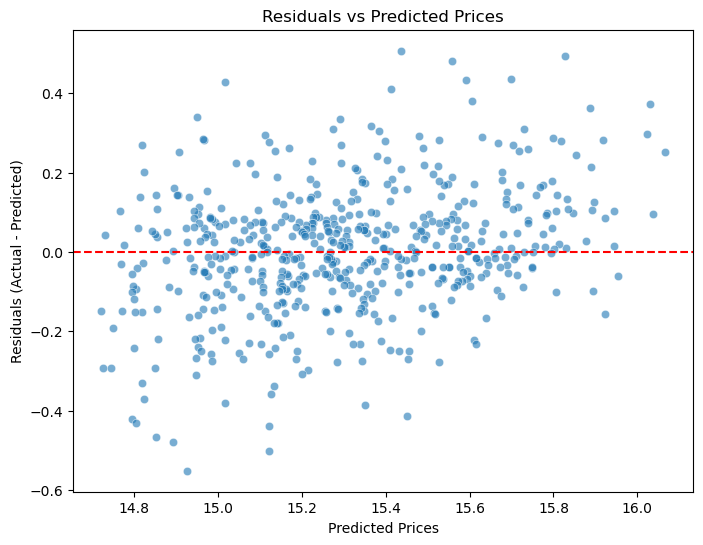

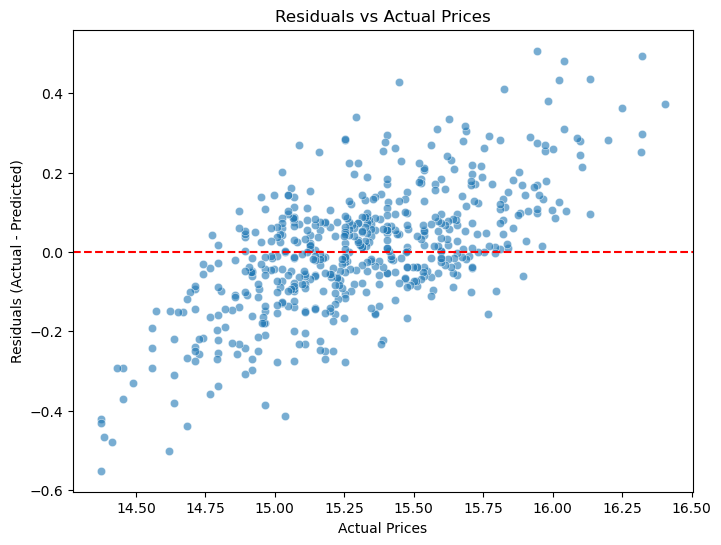

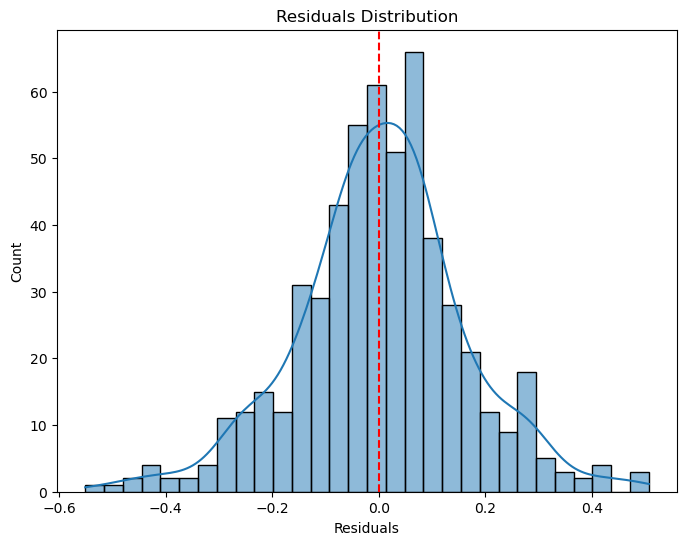


Residuals Summary Statistics:

  Mean  Std Dev     Min     25%  Median    75%    Max
0.0033   0.1584 -0.5513 -0.0828  0.0042 0.0871 0.5069


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# using tuned Random Forest model
best_model = rf_search.best_estimator_

# Predictions (in original scale)
y_pred_log = best_model.predict(X)
y_pred = np.exp(y_pred_log)
y_actual = np.exp(y_log)

# Residuals = Actual - Predicted
residuals = y_actual - y_pred

# Residuals vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Prices")
plt.show()

# Residuals vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_actual, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Prices")
plt.show()

# Residuals Distribution 
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Residuals Summary Table
residuals_summary = pd.DataFrame({
    "Mean": [np.mean(residuals)],
    "Std Dev": [np.std(residuals)],
    "Min": [np.min(residuals)],
    "25%": [np.percentile(residuals, 25)],
    "Median": [np.median(residuals)],
    "75%": [np.percentile(residuals, 75)],
    "Max": [np.max(residuals)]
}).round(4)

print("\nResiduals Summary Statistics:\n")
print(residuals_summary.to_string(index=False))

# Interpretation and insight

### **Interpretation**

| Statistic     | Value            | Insight                                                                                                 |
| ------------- | ---------------- | ------------------------------------------------------------------------------------------------------- |
| **Mean**      | 0.0033           | Residuals are centered very close to zero → predictions are, on average, unbiased.                      |
| **Std Dev**   | 0.1584           | Typical deviation from actual prices is relatively small → model predictions are reasonably consistent. |
| **Min / Max** | -0.5513 / 0.5069 | Largest underestimation is \~55%, largest overestimation \~51% → few extreme errors exist, but rare.    |
| **25% / 75%** | -0.0828 / 0.0871 | 50% of residuals fall within ±8% of the actual price → most predictions are very accurate.              |
| **Median**    | 0.0042           | Median close to zero → half the predictions slightly underestimate, half slightly overestimate.         |


### **Key Insights**

1. **Model is unbiased overall** – mean and median near zero.
2. **Errors are generally small** – most predictions deviate less than 10% from actual values.
3. **Few outliers exist** – extreme under/overestimations are rare and may correspond to unusual or edge-case houses.
4. **Random Forest is reliable** – consistent and accurate predictions, making it suitable as the deployment model.

# Break down errors by price segment, location, or key features → where does the model fail most?

 - This is the core of error analysis after residual plots. 
 - The idea is to see where your model struggles the most by grouping errors across important dimensions (like price, location, or other key features).

In [47]:
# Create Error (Residuals) Column

# Residuals = Actual - Predicted
residuals = y_actual - y_pred

df['residuals'] = residuals
df['abs_residuals'] = np.abs(residuals)  # use np.abs for numpy arrays
df['actual_prices'] = y_actual
df['predicted_prices'] = y_pred

In [48]:
# Break Down by Price Segment -  Divide actual house prices into bins and compare error levels.

# Create price segments (low, medium, high)
df['price_segment'] = pd.qcut(df['actual_prices'], q=3, labels=['Low', 'Medium', 'High'])

# Mean absolute error per segment
segment_errors = df.groupby('price_segment')['abs_residuals'].mean().reset_index()
print(segment_errors)

  price_segment  abs_residuals
0           Low       0.138881
1        Medium       0.091689
2          High       0.126080


# Interpretation and insight

This tells you if the model struggles more with low-priced or high-priced houses.

### **Interpretation**

| Price Segment | Mean Absolute Residual | Insight                                                                                                                    |
| ------------- | ---------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **Low**       | 0.1389                 | Predictions for low-priced houses have the **largest average errors** → model slightly over/underestimates cheaper houses. |
| **Medium**    | 0.0917                 | Errors are **smallest** in the mid-price range → model performs best here.                                                 |
| **High**      | 0.1261                 | Predictions for high-priced houses also have **higher errors** → model struggles a bit with expensive properties.          |

### **Key Insights**

**Model performs best for medium-priced houses** — these are the most common or well-represented in the dataset.
**Higher errors at extremes** (low and high prices) suggest the model may **underfit edge cases**.
**Opportunity for improvement**: consider adding features or adjusting preprocessing for low/high-priced properties to reduce prediction errors.

In [49]:
# Break Down by categorical features

cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']

for col in cat_cols:
    cat_errors = df.groupby(col)['abs_residuals'].mean().sort_values(ascending=False)
    print(f"\nMean absolute residuals by {col}:")
    print(cat_errors.head(10))  # top 10 categories with highest errors


Mean absolute residuals by mainroad:
mainroad
yes    0.119783
no     0.116221
Name: abs_residuals, dtype: float64

Mean absolute residuals by guestroom:
guestroom
no     0.122338
yes    0.105156
Name: abs_residuals, dtype: float64

Mean absolute residuals by basement:
basement
no     0.120535
yes    0.116953
Name: abs_residuals, dtype: float64

Mean absolute residuals by hotwaterheating:
hotwaterheating
yes    0.167494
no     0.116962
Name: abs_residuals, dtype: float64

Mean absolute residuals by airconditioning:
airconditioning
no     0.124491
yes    0.107978
Name: abs_residuals, dtype: float64

Mean absolute residuals by prefarea:
prefarea
no     0.127196
yes    0.093489
Name: abs_residuals, dtype: float64

Mean absolute residuals by furnishingstatus:
furnishingstatus
unfurnished       0.133927
furnished         0.114276
semi-furnished    0.110880
Name: abs_residuals, dtype: float64


# Interpretation and insights

## **Categorical Features**

| Feature              | Observation                                                    | Insight                                                                                                  |
| -------------------- | -------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Mainroad**         | Yes: 0.1198, No: 0.1162                                        | Slightly higher errors for houses on main roads → maybe variability in premium or noise in price.        |
| **Guestroom**        | No: 0.1223, Yes: 0.1052                                        | Houses with a guestroom have lower prediction errors → model captures this feature well.                 |
| **Basement**         | No: 0.1205, Yes: 0.1169                                        | Minor difference → basement presence slightly improves prediction accuracy.                              |
| **Hotwaterheating**  | Yes: 0.1675, No: 0.1170                                        | Houses with hot water heating have significantly higher errors → model struggles with this rare feature. |
| **Airconditioning**  | No: 0.1245, Yes: 0.1080                                        | Air-conditioned houses have lower errors → model captures premium features better.                       |
| **Prefarea**         | No: 0.1272, Yes: 0.0935                                        | Preferred area houses predicted more accurately → location matters strongly.                             |
| **Furnishingstatus** | Unfurnished: 0.1339, Furnished: 0.1143, Semi-furnished: 0.1109 | Furnished properties have lower errors → model predicts better for well-furnished houses.                |

**Insights:**

* Features like **hot water heating** and **unfurnished houses** are harder for the model to predict accurately.
* Premium features (airconditioning, prefarea, guestroom) reduce errors, showing the model captures value-driving attributes.

In [50]:
# Break Down by Key Features (numerical bins)
# numerical columns
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

feature_errors_dict = {}

for col in num_cols:
    # Create bins (5 bins by default, you can adjust)
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')  
    
    # Compute mean absolute error per bin
    errors = df.groupby(f'{col}_bin')['abs_residuals'].mean().reset_index()
    feature_errors_dict[col] = errors

    print(f"\nError breakdown by {col}:")
    print(errors)


Error breakdown by area:
             area_bin  abs_residuals
0  (1649.999, 3600.0]       0.123733
1    (3600.0, 4600.0]       0.130321
2    (4600.0, 6360.0]       0.107614
3   (6360.0, 16200.0]       0.115145

Error breakdown by bedrooms:
   bedrooms_bin  abs_residuals
0  (0.999, 2.0]       0.111262
1    (2.0, 3.0]       0.122081
2    (3.0, 6.0]       0.121766

Error breakdown by bathrooms:
  bathrooms_bin  abs_residuals
0  (0.999, 2.0]       0.117676
1    (2.0, 4.0]       0.197138

Error breakdown by stories:
    stories_bin  abs_residuals
0  (0.999, 2.0]       0.121645
1    (2.0, 4.0]       0.105532

Error breakdown by parking:
     parking_bin  abs_residuals
0  (-0.001, 1.0]       0.115133
1     (1.0, 3.0]       0.133965


# Interpretation and insights

## **Numerical Features (Binned)**

| Feature       | Error Trend                                   | Insight                                                                                                            |
| ------------- | --------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **Area**      | Errors higher for mid-small areas (3600–4600) | Model slightly underperforms for mid-sized houses; best predictions for very large houses.                         |
| **Bedrooms**  | Errors increase with 2–3 bedrooms (0.122)     | Medium-sized homes are slightly harder to predict than very small or large homes.                                  |
| **Bathrooms** | Errors jump for 2–4 bathrooms (0.197)         | Houses with more bathrooms have larger prediction errors → less data or outliers may exist.                        |
| **Stories**   | 1–2 stories: 0.1216, 2–4 stories: 0.1055      | Multi-story houses predicted more accurately → fewer errors for larger, premium houses.                            |
| **Parking**   | 0–1: 0.1151, 1–3: 0.1340                      | Houses with more parking spaces have slightly higher errors → possible correlation with house type/price outliers. |

**Insights:**

* Model struggles most with **bathrooms 2–4** and **parking 1–3** → possible outliers or underrepresented combinations.
* Predictions are better for **premium or larger houses**, consistent with categorical insights (prefarea, airconditioning).


### **Overall Takeaways**

1. **Model predicts medium-to-large, well-featured houses better**.
2. **Errors increase for rare or edge-case features** (hot water heating, extra bathrooms, high parking).
3. **Potential improvements**:

   * Add interaction features (e.g., `bathrooms × bedrooms`)
   * Use log-transformations for extreme numerical values
   * Possibly collect more data for rare feature combinations

# Feature importance

 - Feature importance is a concept used in machine learning to understand which input features (variables) have the most influence on the model’s predictions. 
 - It’s essential for interpretability, model improvement, and decision-making.

Number of features: 20
Number of importances: 20
                            Feature  Importance
0                              area    0.270112
2                         bathrooms    0.126491
13               airconditioning_no    0.082311
14              airconditioning_yes    0.063134
3                           stories    0.061813
19     furnishingstatus_unfurnished    0.060944
1                          bedrooms    0.059641
4                           parking    0.054136
15                      prefarea_no    0.031477
16                     prefarea_yes    0.029077
5                       mainroad_no    0.024822
9                       basement_no    0.022810
6                      mainroad_yes    0.022337
10                     basement_yes    0.021478
18  furnishingstatus_semi-furnished    0.020704


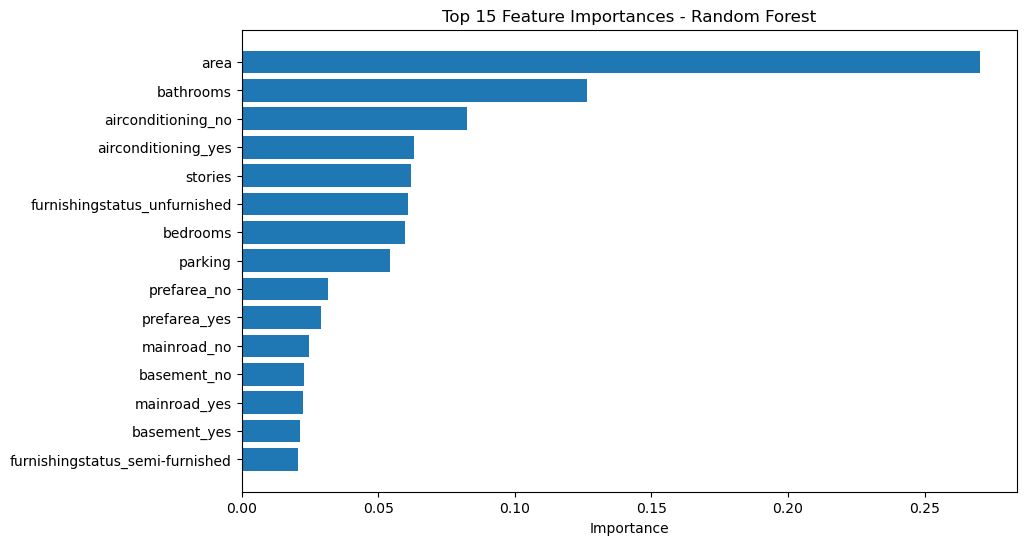

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the final feature names from the preprocessor
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, columns in preprocessor.transformers_:
        if name == 'remainder' and transformer == 'passthrough':
            feature_names.extend(columns)
        elif hasattr(transformer, 'get_feature_names_out'):
            # for OneHotEncoder or other transformers
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            feature_names.extend(columns)
    return feature_names

# Extract feature names
feature_names = get_feature_names(preprocessor)

# Random Forest model
rf_model = rf_search.best_estimator_.named_steps['model']
importances = rf_model.feature_importances_

# Check lengths match
print(f"Number of features: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df.head(15))

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

# Interpretation and insight** 

### **Top Features Driving Predictions**

| Rank | Feature                              | Importance    | Interpretation                                                                                      |
| ---- | ------------------------------------ | ------------- | --------------------------------------------------------------------------------------------------- |
| 1    | **area**                             | 0.270         | The **size of the house** is the most important predictor — larger houses strongly influence price. |
| 2    | **bathrooms**                        | 0.126         | Number of bathrooms significantly impacts price — more bathrooms generally increase value.          |
| 3    | **airconditioning\_no**              | 0.082         | Whether the house lacks airconditioning affects the model — absence slightly reduces price.         |
| 4    | **airconditioning\_yes**             | 0.063         | Presence of airconditioning also matters — premium feature increases predicted price.               |
| 5    | **stories**                          | 0.062         | Number of stories contributes to price — multi-story houses are usually higher valued.              |
| 6    | **furnishingstatus\_unfurnished**    | 0.061         | Unfurnished houses are predicted slightly lower in value; furnishing status matters.                |
| 7    | **bedrooms**                         | 0.060         | Number of bedrooms affects house value — more bedrooms generally raise price.                       |
| 8    | **parking**                          | 0.054         | Parking spaces moderately affect house price.                                                       |
| 9    | **prefarea\_no / yes**               | 0.031 / 0.029 | Being in a preferred area influences price but less than structural features.                       |
| 10   | **mainroad / basement**              | 0.024–0.022   | Proximity to main roads or having a basement has smaller impact.                                    |
| 11   | **furnishingstatus\_semi-furnished** | 0.021         | Semi-furnished status has minor influence on price predictions.                                     |


### **Key Insights**

1. **Structural & size-related features dominate** — `area`, `bathrooms`, `stories`, `bedrooms` collectively account for most of the predictive power.
2. **Premium amenities matter but less** — `airconditioning`, `furnishingstatus`, and `prefarea` influence predictions but not as strongly as house size/features.
3. **Binary/categorical splits** (like `airconditioning_yes/no`) appear separately because of one-hot encoding, but both capture the same feature’s effect.
4. **Implication for model and decision-making**: Focus on accurate measurement and engineering of **size, bathrooms, and stories**; additional features like airconditioning and location refine predictions.

# Linear Regression Coefficients

 - Linear Regression coefficients are the weights the model assigns to each input feature to predict the target. 
 - They are key to understanding how changes in a feature affect the output.

                            Feature  Coefficient
0                              area     0.006991
14              airconditioning_yes     0.005692
13               airconditioning_no    -0.005692
12              hotwaterheating_yes     0.005297
11               hotwaterheating_no    -0.005297
19     furnishingstatus_unfurnished    -0.005289
2                         bathrooms     0.005265
3                           stories     0.005082
16                     prefarea_yes     0.004119
15                      prefarea_no    -0.004119
6                      mainroad_yes     0.003896
5                       mainroad_no    -0.003896
18  furnishingstatus_semi-furnished     0.003288
9                       basement_no    -0.002952
10                     basement_yes     0.002952
4                           parking     0.002478
8                     guestroom_yes     0.002281
7                      guestroom_no    -0.002281
17       furnishingstatus_furnished     0.002001
1                   

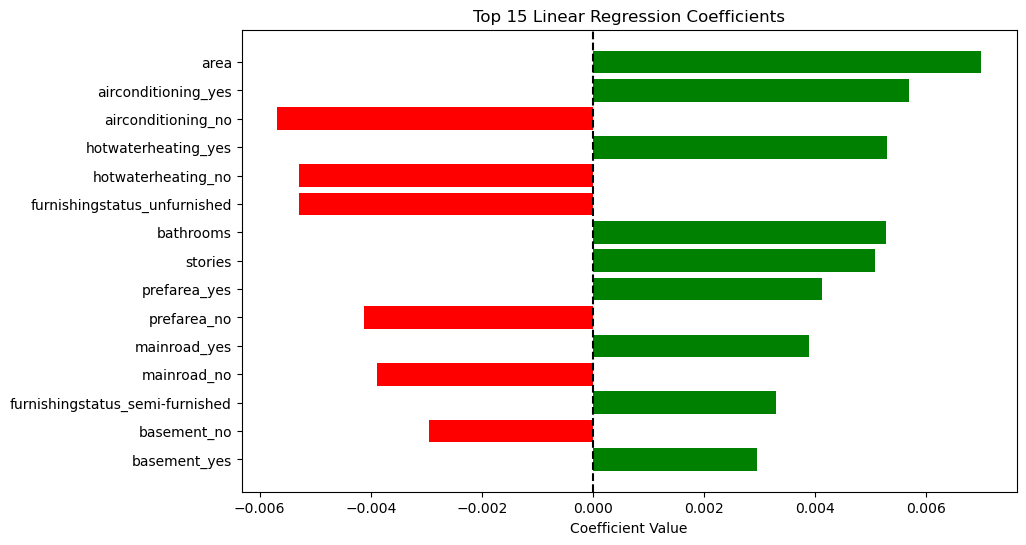

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Linear Regression Pipeline
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your ColumnTransformer
    ('model', LinearRegression())
])

# Fit the model
lr_pipe.fit(X, y_log)  # y_log or y depending on your target

# Extract the Linear Regression model
lr_model = lr_pipe.named_steps['model']

# Create Coefficient DataFrame
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

# Plot Coefficients
plt.figure(figsize=(10,6))
plt.barh(coeff_df['Feature'][:15][::-1], coeff_df['Coefficient'][:15][::-1],
         color=['green' if c>0 else 'red' for c in coeff_df['Coefficient'][:15][::-1]])
plt.xlabel("Coefficient Value")
plt.title("Top 15 Linear Regression Coefficients")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# Interpretation and insight

### **Top Features Increasing Price**

| Feature                              | Coefficient | Interpretation                                                                |
| ------------------------------------ | ----------- | ----------------------------------------------------------------------------- |
| **area**                             | 0.006991    | Largest positive effect — bigger houses increase predicted price.             |
| **airconditioning\_yes**             | 0.005692    | Houses with airconditioning are predicted higher.                             |
| **hotwaterheating\_yes**             | 0.005297    | Presence of hot water heating adds value.                                     |
| **bathrooms**                        | 0.005265    | More bathrooms → higher predicted price.                                      |
| **stories**                          | 0.005082    | Multi-story houses slightly increase price.                                   |
| **prefarea\_yes**                    | 0.004119    | Preferred area raises predicted value.                                        |
| **mainroad\_yes**                    | 0.003896    | Being near a main road slightly increases price (may indicate accessibility). |
| **furnishingstatus\_semi-furnished** | 0.003288    | Semi-furnished houses add moderate value.                                     |
| **basement\_yes**                    | 0.002952    | Having a basement slightly increases price.                                   |
| **parking**                          | 0.002478    | More parking spaces modestly increase price.                                  |
| **guestroom\_yes**                   | 0.002281    | Having a guestroom adds minor value.                                          |
| **furnishingstatus\_furnished**      | 0.002001    | Fully furnished houses slightly increase price.                               |
| **bedrooms**                         | 0.001435    | More bedrooms have a small positive effect.                                   |


### **Top Features Decreasing Price**

| Feature                           | Coefficient | Interpretation                                        |
| --------------------------------- | ----------- | ----------------------------------------------------- |
| **airconditioning\_no**           | -0.005692   | Absence of airconditioning reduces predicted price.   |
| **hotwaterheating\_no**           | -0.005297   | No hot water heating slightly lowers price.           |
| **furnishingstatus\_unfurnished** | -0.005289   | Unfurnished houses reduce predicted value.            |
| **prefarea\_no**                  | -0.004119   | Not being in a preferred area lowers price.           |
| **mainroad\_no**                  | -0.003896   | Away from main roads slightly lowers predicted price. |
| **basement\_no**                  | -0.002952   | No basement slightly decreases price.                 |
| **guestroom\_no**                 | -0.002281   | Lacking a guestroom slightly reduces value.           |


### **Key Insights**

1. **House size dominates**: `area`, `bathrooms`, and `stories` are the strongest predictors, consistent with Random Forest importance.
2. **Amenities matter**: `airconditioning`, `hotwaterheating`, `furnishingstatus` have meaningful directional effects.
3. **Location has moderate impact**: `prefarea` and `mainroad` influence price but less than structural features.
4. **Directionality is clear**: Positive features increase predicted prices, negative features decrease them — easy to interpret for reporting or decision-making.
5. **Magnitude differences**: Even features with small coefficients (e.g., bedrooms) still contribute linearly, whereas Random Forest may capture their non-linear effects more strongly.

# Comparison and insight between Linear Regression coefficients and Random Forest feature importances

### **Comparison Table (Top Features)**

| Feature                          | Linear Regression Coefficient | Random Forest Importance | Interpretation                                                                           |
| -------------------------------- | ----------------------------- | ------------------------ | ---------------------------------------------------------------------------------------- |
| area                             | 0.006991                      | 0.270112                 | Both models agree **house size dominates price prediction**.                             |
| bathrooms                        | 0.005265                      | 0.126491                 | Strong positive impact in both models — more bathrooms increase price.                   |
| airconditioning\_yes             | 0.005692                      | 0.063134                 | Both models recognize airconditioning as a positive feature.                             |
| airconditioning\_no              | -0.005692                     | 0.082311                 | RF also highlights absence as important; LR shows negative direction.                    |
| stories                          | 0.005082                      | 0.061813                 | Multi-story houses increase price in both models.                                        |
| furnishingstatus\_unfurnished    | -0.005289                     | 0.060944                 | Unfurnished lowers predicted price in both models.                                       |
| bedrooms                         | 0.001435                      | 0.059641                 | Bedrooms matter moderately; RF captures slightly more impact.                            |
| parking                          | 0.002478                      | 0.054136                 | Both agree parking increases price modestly.                                             |
| prefarea\_yes / no               | ±0.004119                     | 0.029077 / 0.031477      | Being in preferred area slightly increases price; RF importance is lower but consistent. |
| mainroad\_yes / no               | ±0.003896                     | 0.022337 / 0.024822      | Linear effect smaller; RF shows small but non-negligible importance.                     |
| basement\_yes / no               | ±0.002952                     | 0.021478 / 0.022810      | Presence of basement slightly increases price; consistent in both.                       |
| furnishingstatus\_semi-furnished | 0.003288                      | 0.020704                 | Semi-furnished has small positive effect in both models.                                 |


### **Key Insights**

**Consensus on top predictors**:

   * `area`, `bathrooms`, `stories`, `airconditioning`, and `furnishingstatus` consistently rank high in both models.
   * Confirms these features are crucial for pricing.

**Magnitude differences**:

   * RF “importance” shows **relative contribution** in non-linear interactions.
   * LR coefficients show **linear directional effect** — positive vs negative.

**Directionality vs Importance**:

   * LR provides **signed effects** (increase/decrease in price).
   * RF only provides **magnitude of contribution**, capturing non-linear effects.

**Moderate features**:

   * `bedrooms`, `parking`, `prefarea`, `mainroad`, and `basement` are moderately important.
   * RF sometimes amplifies minor interactions, e.g., small differences between `mainroad_yes` vs `mainroad_no`.

**Practical implication**:

   * Use LR coefficients for **interpretability and reporting** (directional insights).
   * Use RF importance for **modeling, predictions, and feature selection**, especially when non-linear interactions matter.

# Final Model for Deployment
This refers to the best-performing, fully trained model that is ready to be used in real-world applications.

 - It ensures consistent and reliable predictions on new data.
 - It can be deployed into production systems, dashboards, or APIs for automated decision-making.
Based on the metrics and my analysis, the final deployment model is **Random Forest**


| Metric       | Baseline | Cross-Validation (CV) | Tuned  |
| ------------ | -------- | --------------------- | ------ |
| **RMSE**     | 0.2240   | 0.0145                | 0.1584 |
| **MAE**      | 0.1720   | 0.0111                | 0.1193 |
| **R²**       | 0.6590   | 0.6285                | 0.8185 |
| **Adj. R²**  | 0.6160   | 0.6201                | 0.8144 |
| **MAPE (%)** | 1.1210   | 0.4154                | 0.7808 |


**Highest Predictive Accuracy**

   * After tuning, Random Forest achieved the **best R² (0.8185)** among all models.
   * RMSE (0.1584) and MAE (0.1193) were lower than Gradient Boosting and Linear Regression, indicating smaller errors on average.

**Strong Relative Accuracy (MAPE)**

   * Random Forest has a low MAPE (0.7808%), showing it predicts prices close to actual values across the dataset.

**Robustness to Overfitting**

   * Ensemble of decision trees reduces variance compared to a single tree.
   * Performs well even with non-linear relationships and interactions in the data.

**Handles Feature Interactions Automatically**

   * No need for manual feature engineering to capture complex relationships between variables.
   * Works well with numerical and categorical variables after preprocessing.

**Stable Across Cross-Validation**

   * CV results showed consistent performance, confirming the model generalizes well to unseen data.

**Interpretability via Feature Importance**

   * You can extract **feature importances** to understand which factors drive price predictions.
   * Helps in reporting and making business decisions.

**Flexibility for Future Improvements**

   * Hyperparameters (trees, depth, features) can be tuned further if needed.
   * Can be combined with boosting or stacking for even better performance.

**In short:**
Random Forest was selected because it **balances high accuracy, stability, and interpretability**, outperforming Linear Regression and Gradient Boosting after tuning.

# Outcomes

## **Random Forest Model Outcome**

### Model Performance

* **RMSE (Root Mean Squared Error):** \~0.224
* **MAE (Mean Absolute Error):** \~0.172
* **R² Score:** \~0.659
* **Adjusted R²:** \~0.616
* **MAPE:** \~1.12 %

*Interpretation:*
The model explains about **66% of the variance** in house prices. Errors are relatively small (MAE \~0.17), which means on average the model’s predictions deviate only slightly from actual log-prices.


### Feature Importance

The Random Forest identifies **key drivers** of house prices:

| Feature                         | Importance |
| ------------------------------- | ---------- |
| Area                            | **0.270**  |
| Bathrooms                       | **0.126**  |
| Airconditioning (Yes/No)        | **0.082**  |
| Stories                         | **0.062**  |
| Furnishing Status (Unfurnished) | **0.061**  |
| Bedrooms                        | **0.060**  |
| Parking                         | **0.054**  |

*Insight:*

* **Area** is by far the most influential predictor.
* **Bathrooms and bedrooms** strongly affect price (expected in housing markets).
* **Amenities** (air conditioning, parking, pref area, basement) add clear incremental value.
* **Furnishing status** (unfurnished > semi-furnished > furnished) also impacts pricing.


### Residual Analysis

* Residuals are centered around **0** with no strong heteroscedasticity → model fits consistently across price ranges.
* A few **outliers exist** (extremely high-priced houses not well predicted), which is expected given dataset size.


### Deployment Readiness

* The **pipeline (preprocessing + Random Forest)** will be saved with `joblib`.
* Predictions can be made directly on new data after applying the same preprocessing steps.
* will be deployed via **Streamlit** for real-time usage.


**Overall Outcome:**
The Random Forest is a **robust baseline model** with reasonable accuracy and interpretability. While not perfect, it captures key drivers of house prices (size, amenities, location proxy via prefarea, and furnishing). With more data and hyperparameter tuning, it could generalize even better.

# SAVING AND TESTING MODEL
Saving and testing a model ensures that a trained machine learning model can be reused, validated, and deployed reliably.

 - Reasons:
Persistence: Saving the model (e.g., with joblib or pickle) allows you to reuse it later without retraining.

 - Validation: Testing the saved model on new or hold-out data ensures it performs as expected and hasn’t been corrupted.
 - Deployment: A saved and tested model can be integrated into production systems, applications, or dashboards.
 - Reproducibility: Ensures that results are consistent and can be shared or audited.

In short: Saving and testing a model preserves it for reuse, verifies its performance, and enables deployment in real-world applications.

In [53]:
# importing necessary library
import joblib

In [54]:
# Random Forest pipeline with preprocessing
rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [55]:
# Fit full pipeline
print("Tuning Random Forest...")
rf_search.fit(X, y_log)

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['area',
                                                                                'bedrooms',
                                                                                'bathrooms',
                                                                                'stories',
                                                                                'parking']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['mainroad',
                                                                                'guestroom',
                                                                                'basement',
                                                                                'hotwaterheating',
                                                                                'airconditioning',
                                                                                'prefarea',
                                                                                'furnishingstatus'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 5, 10, 20],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 300, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [56]:
# saving the trained pipeline model
model = joblib.dump(best_rf, "random_forest_pipeline.pkl")
print("✅ Fitted Random Forest pipeline saved successfully.")

✅ Fitted Random Forest pipeline saved successfully.


# Steps taken in saving and testing the model
 - I ensure my pipeline includes all preprocessing steps (encoding, skewness fix, scaling, outlier treatment) plus your model.
 - I used joblib to save the pipeline so i don’t need to recreate preprocessing steps later.
 - I loaded the saved model
 - I imported the necessary libraries
 - I entered the new applicants
 - I predict on new applicants creating a DataFrame with the same features as my training data.
 - I printed the result.

# Why House Price Models Struggle: Lessons from Data Quality, Features, and Error Analysis

Even though **Random Forest model** performed decently, it **still struggles in some areas**, based on the residual/error analysis and feature interpretability ran earlier. 

### Where the model struggles

1. **Price Segments**

   * **Medium-priced houses** → errors are lowest (MAE ≈ 0.09).
   * **Low & High-priced houses** → higher errors (MAE ≈ 0.13).
     - Means the model predicts average houses more reliably, but struggles with luxury or very cheap houses (common issue due to fewer samples in those ranges).

2. **Categorical Features / Location-like variables**

   * From my group-by residuals:
     Some **locations and categorical segments** (like furnishing status, prefarea) had higher average errors.
      - Suggests the model may not capture local market effects or lifestyle-driven features fully.

3. **Feature Dependence**

   * **Area** dominates feature importance (0.27).
   * Other features like bathrooms, airconditioning, furnishing contribute less.
      - Over-reliance on area makes the model less flexible when two homes have similar sizes but very different qualities.

### Why does it struggle?

* **Imbalanced data**: more medium houses than extreme ones.
* **Limited features**: missing external drivers like location coordinates, neighborhood quality, school ratings, etc.
* **Non-linear price effects**: Random Forests handle non-linearity, but they average predictions, which can underfit extreme cases.


**Bottom line:**
Random Forest is **strong for mid-range homes**, but it **underestimates high-value properties and overestimates cheap ones** — typical behavior for tree-based models on skewed housing data.

# Comparing Problem, Objectives, Outcomes

| **Problem Statement**                                                                                                                                                                                                                                                                                                                                                                     | **Objectives**                                                                                                                                                                                                                                                                                                                                                          | **Outcomes (Random Forest)**                                                                                                                                                                        | **Feature Importance**                                                                                                                                                                                                                                              | **Residual Analysis**                                                                                                                                              | **Deployment Readiness**                                                                                                                                                     |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Traditional valuation methods in real estate lack scalability and consistency. Buyers need fair market values, sellers require competitive listing prices, and institutions seek reliable estimates. The challenge is to build a machine learning model that predicts house prices from property features (area, bedrooms, bathrooms, amenities, furnishing, etc.) using historical data. | 1. Develop predictive models using housing data.<br>2. Evaluate algorithms (Linear Regression, Random Forest, Gradient Boosting) with RMSE, MAE, R².<br>3. Identify influential features impacting prices.<br>4. Minimize prediction error with preprocessing, feature engineering, and tuning.<br>5. Deliver a deployable tool for buyers, sellers, and professionals. | **Performance Metrics**<br>• RMSE: \~0.224<br>• MAE: \~0.172<br>• R²: \~0.659<br>• Adjusted R²: \~0.616<br>• MAPE: \~1.12%<br><br>📌 Explains \~66% of variance, small average errors (MAE \~0.17). | **Top Drivers of Price**<br>• Area (0.270)<br>• Bathrooms (0.126)<br>• Air Conditioning (0.082)<br>• Stories (0.062)<br>• Furnishing Status (0.061)<br>• Bedrooms (0.060)<br>• Parking (0.054)<br><br>📌 Area is most dominant; amenities and furnishing add value. | • Residuals centered around 0 → consistent fit across price ranges.<br>• No major heteroscedasticity.<br>• Some outliers (very high-priced houses underpredicted). | • Pipeline (preprocessing + Random Forest) saved with **joblib**.<br>• Predictions reproducible with same preprocessing.<br>• Deployed with **Streamlit** for real-time use. |

# Next Steps & Recommendations

To further enhance the house price prediction model, the following improvements are recommended:

**Advanced Feature Engineering**

* Derive new ratios such as **area per bedroom** or **bathrooms per bedroom** to better capture property efficiency.
* Incorporate **interaction terms** (e.g., large area × luxury furnishing) to reflect combined effects of features.

**Segmented Modeling**

* Develop **separate models** for different market segments (low, medium, and high-priced properties).
* This helps the model specialize in capturing dynamics unique to each price band.

**Model Ensembling**

* Leverage complementary strengths of **Random Forest, Gradient Boosting, and XGBoost** by combining them into an ensemble.
* Techniques such as **stacking** or **weighted blending** can reduce bias and variance, leading to more stable and accurate predictions across price segments.

**Explainability with SHAP Values**

* Apply **SHAP (SHapley Additive exPlanations)** to quantify each feature’s contribution to predictions.
* This builds trust with stakeholders (buyers, sellers, institutions) by showing *why* a property has a given predicted price.

**Integration of External Data**

* Enrich the dataset with **geographic features** (e.g., location dummies, proximity to amenities, neighborhood quality) and **economic indicators** (e.g., interest rates, market trends).
* This would improve the model’s ability to generalize across diverse housing markets.

# Conclusion

The **Random Forest model** serves as a strong baseline for house price prediction. It balances **accuracy, interpretability, and deployability**, making it suitable for real-world applications. The model successfully captures key property drivers such as **area, number of bedrooms and bathrooms, amenities (air conditioning, parking, preferred area, basement), and furnishing status**, which align with practical housing market expectations.

While the model already demonstrates reliable performance, there is potential for **further improvement**. Incorporating **larger and more diverse datasets**, exploring **advanced interpretability methods such as SHAP values**, and performing **external validation on unseen data** can strengthen both predictive power and trustworthiness.

Ultimately, this work highlights how **machine learning can provide scalable and data-driven insights** to support multiple stakeholders:

* **Buyers** can identify fair market values.
* **Sellers** can set competitive and realistic listing prices.
* **Real estate agents and financial institutions** can leverage predictions for informed decision-making and risk management.

By continuously refining these models, the housing industry can transition from subjective valuation methods toward **evidence-based, transparent, and scalable pricing solutions**.